<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [174]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import Image
from IPython.core.display import HTML 

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_csv = './sat_scores.csv'

In [3]:
sat_scores_file = ''
with open(sat_scores_csv, 'r') as f:
    sat_scores_file = f.read()

#splitting raw csv file for ',' and splitlines
sat_scores_file_split = [rows.split(',') for rows in sat_scores_file.splitlines()]

#slicing header from main file
sat_scores_header = sat_scores_file_split[0]

#slicing sat scores info from main file
sat_scores_details = sat_scores_file_split[1:]

print sat_scores_details

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

In [4]:
# converting numbers into integers as they became strings after splitting

sat_scores_details_float = [[int(item) if item.isdigit() else item for item in rows] for rows in sat_scores_details]

In [6]:
# creating a dictionary with 4 keys. Each key is represented by 1st row of each column and values are the remaining rows 
# in respective columns.

sat_scores_data = {sat_scores_header[i]: [row[i] for row in sat_scores_details_float] for i in range(len(sat_scores_header))}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
# creating a pandas DataFrame for the SAT dictionary created earlier

df_sat = pd.DataFrame(sat_scores_data, columns=sat_scores_header)
df_sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [8]:
# checking for types of dataset columns

df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
# using pandas to create a Dataframe from our dataset

df = pd.read_csv(sat_scores_csv)

In [10]:
# checking for types of dataset columns

df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

There is no difference when comparing the header of each columns. However, an additional step was required to change from string to integer for 3 keys / columns after splitting the list sat_scores_details.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
df.head(5)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


State: different stats in USA <br>
Rate: Might be the mean participation rates of the SAT test <br>
Verbal: Might be the mean scores for SAT test Verbal category for the state <br>
Math: Might be the mean scores for SAT test Math category for the state <br>

After further research, SAT scores are on a scale between 200 - 800. Hence, we can conclude that the Verbal and Math scores below are out of 800.

In [13]:
df.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [14]:
df['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [15]:
# dropping the last row as it is seems to be the average of all the listed states

df = df.drop(51)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [17]:
data_dict= {'column_name':df.columns.values,
           'column_type': df.dtypes,
           'column_description': {'State': 'State where Rate and Scores are from', 'Rate': 'Mean SAT participation rate of state',
                          'Verbal': 'Mean Verbal Score of State', 'Math': 'Mean Math Score of State'},
           'data_shape': df.shape
            }

pprint(data_dict)

{'column_description': {'Math': 'Mean Math Score of State',
                        'Rate': 'Mean SAT participation rate of state',
                        'State': 'State where Rate and Scores are from',
                        'Verbal': 'Mean Verbal Score of State'},
 'column_name': array(['State', 'Rate', 'Verbal', 'Math'], dtype=object),
 'column_type': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object,
 'data_shape': (51, 4)}


In [18]:
print df.describe()

            Rate      Verbal        Math
count  51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137
std    27.550681   33.360667   36.287393
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  503.000000
50%    33.000000  527.000000  525.000000
75%    64.000000  562.000000  557.500000
max    82.000000  593.000000  603.000000


In [19]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB
None


In [20]:
print df.shape

(51, 4)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0,0.5,u'Count')

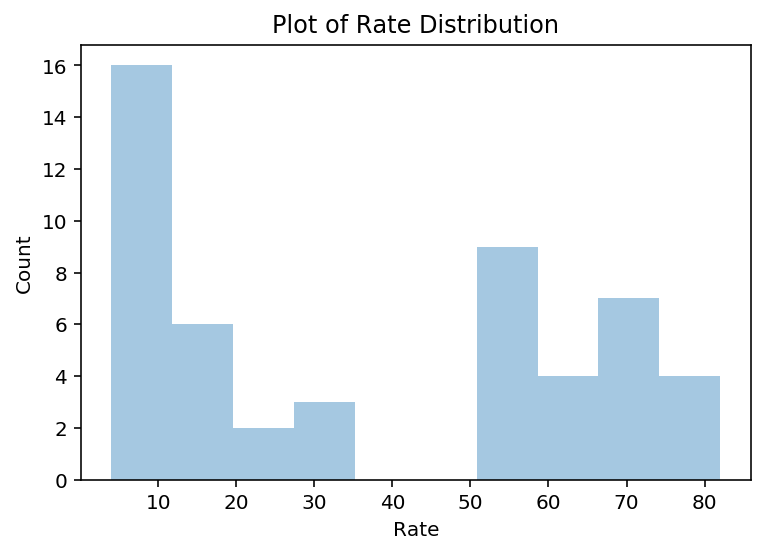

In [26]:
sns.distplot(df['Rate'], kde=False, bins=10).set(title='Plot of Rate Distribution')
plt.ylabel('Count')

Text(0,0.5,u'Count')

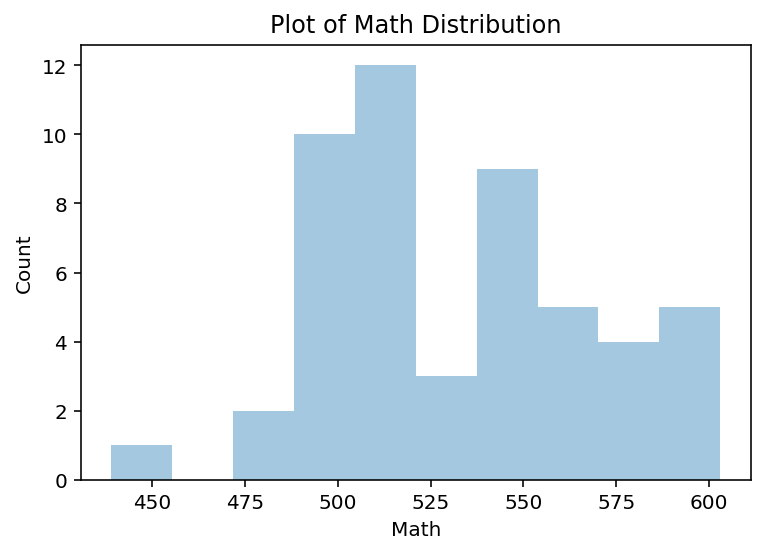

In [27]:
verbal_plot = sns.distplot(df['Math'], kde=False, bins=10).set(title='Plot of Math Distribution')
plt.ylabel('Count')

Text(0,0.5,u'Count')

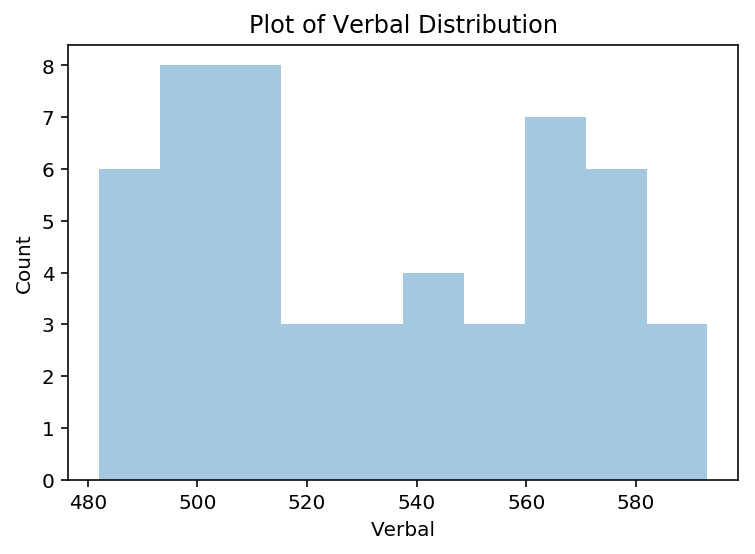

In [28]:
sns.distplot(df['Verbal'], kde=False, bins=10).set(title='Plot of Verbal Distribution')
plt.ylabel('Count')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

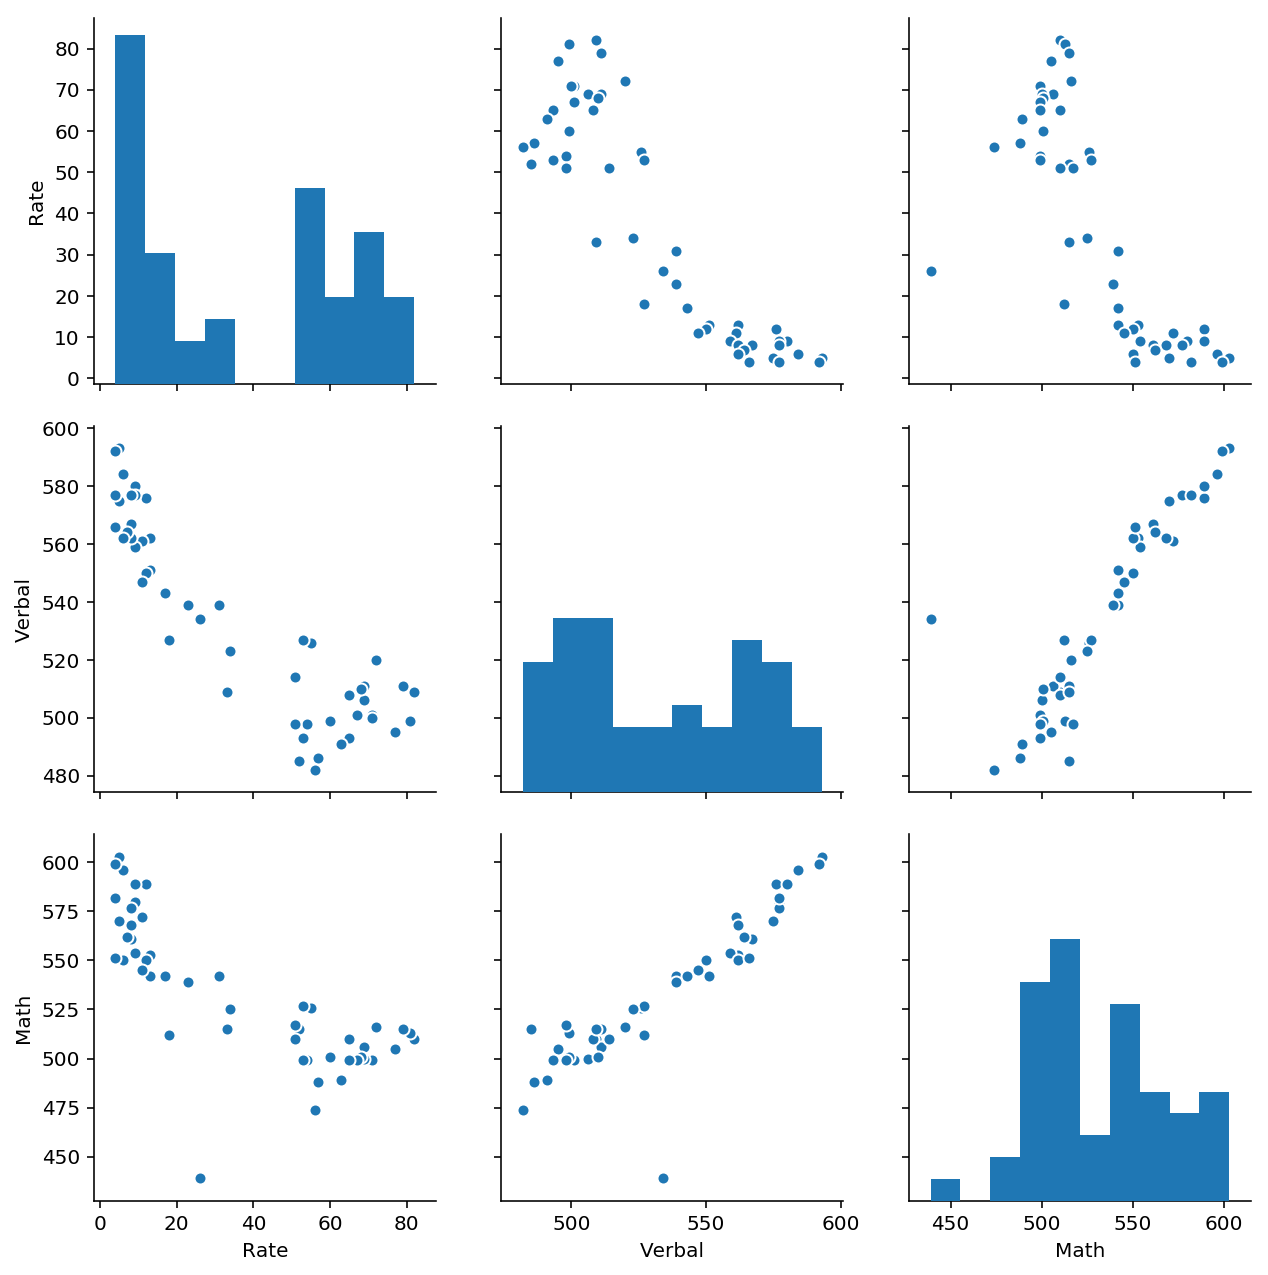

In [29]:
sns.pairplot(df, size=3)

Math and Verbal have a positive distribution. As the Verbal score increase, so does the Math score. However, it was observed that there was an outlier in the distribution.

On the other hand, distribution for Math & Rate and Verbal & Rate shows a negative distribution.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,0,u'Verbal & Math')

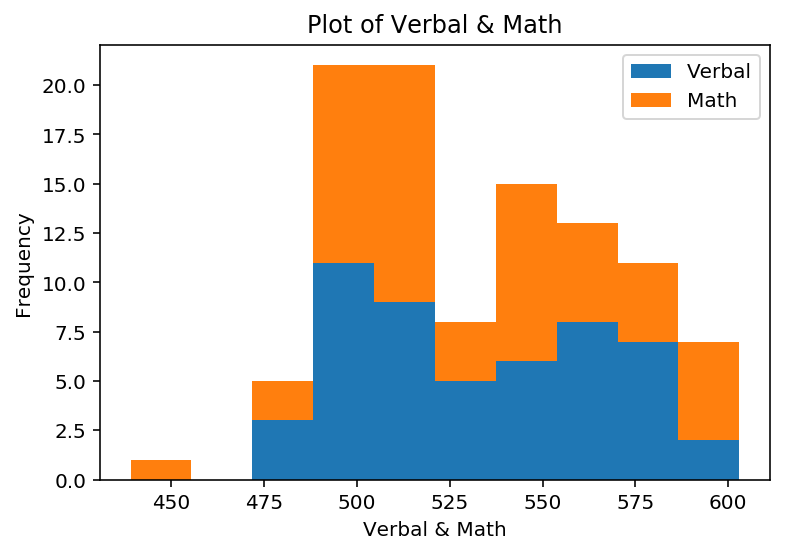

In [30]:
df[['Verbal','Math']].plot(kind='hist', title='Plot of Verbal & Math', legend=True, stacked=True)
plt.xlabel('Verbal & Math')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0,0.5,u'Scores')

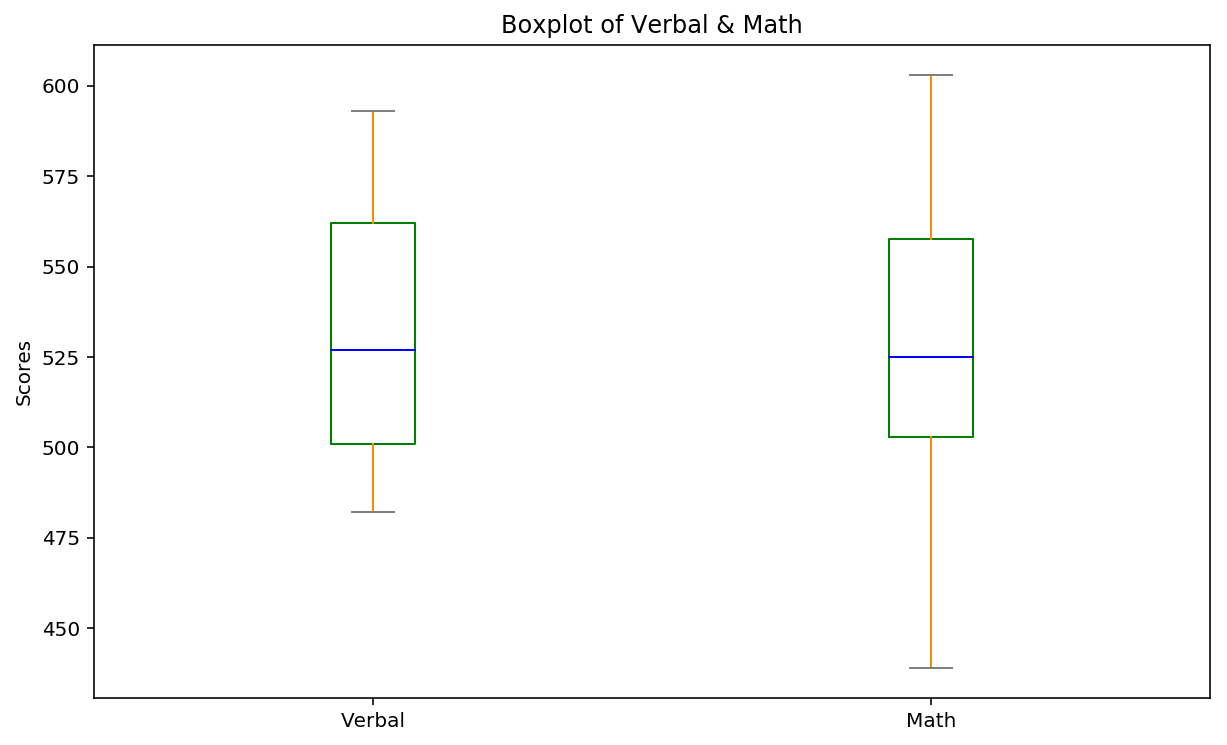

In [31]:
box_plot_colour = dict(boxes='Green', whiskers='DarkOrange', medians='Blue', caps='Gray')
df[['Verbal','Math']].plot(kind='box', title='Boxplot of Verbal & Math', legend=True, color=box_plot_colour, figsize=(10,6))
plt.ylabel('Scores')

Text(0,0.5,u'Scores')

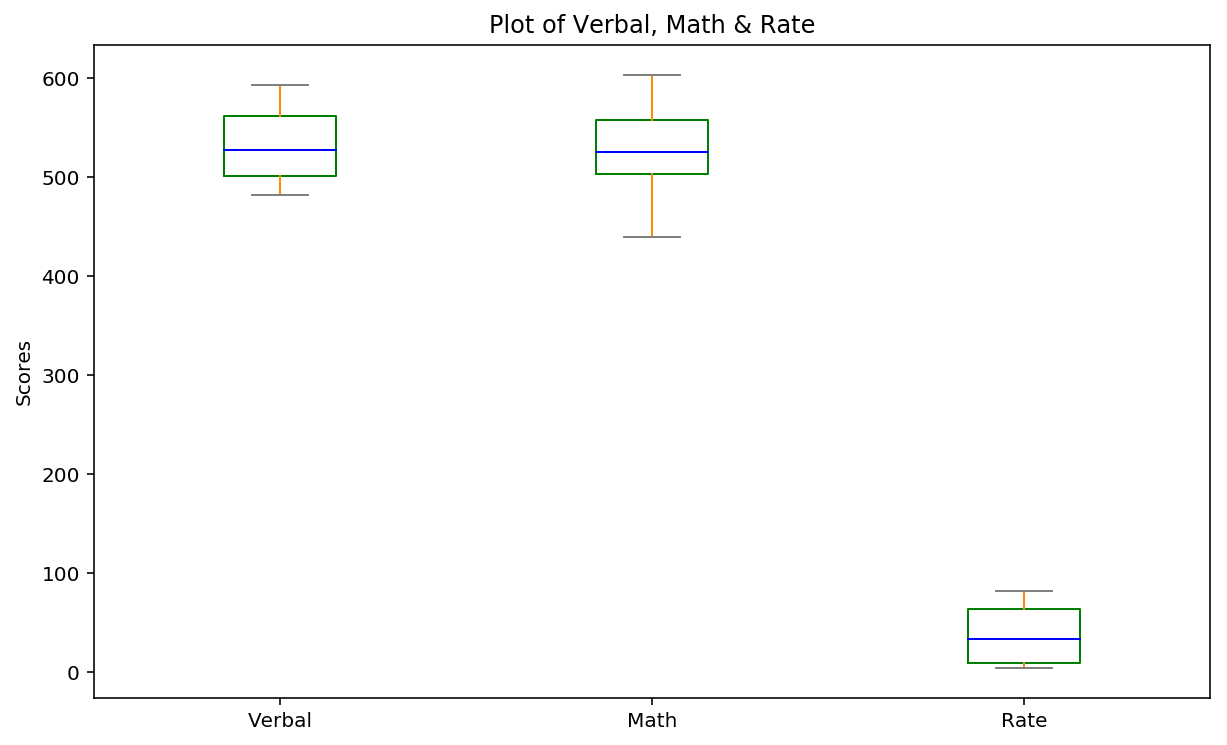

In [33]:
df[['Verbal','Math','Rate']].plot(kind='box', title='Plot of Verbal, Math & Rate', legend=True, color=box_plot_colour, figsize=(10,6))
plt.ylabel('Scores')

Rate seems to be in percentage (out of 100%), while Verbal and Math scores are values out of 800 (based on SAT scores research). We will need to normalize or standardize Rate, Verbal and Math columns for plotting.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [38]:
# normalization based on formula: (x - min) / (max - min). This will keep the scale between 0 to 1.

df_scale = df.copy()

def normalization_scale(column):
    new_col = (df_scale[column] - df_scale[column].min()) / (df_scale[column].max() - df_scale[column].min())
    df_scale[column] = new_col
    return df_scale

normalization_scale('Rate')
normalization_scale('Verbal')
normalization_scale('Math')

df_scale.head()

,State,Rate,Verbal,Math
0,CT,1.000000,0.243243,0.432927
1,NJ,0.987179,0.153153,0.451220
2,MA,0.961538,0.261261,0.463415
3,NY,0.935897,0.117117,0.402439
4,NH,0.871795,0.342342,0.469512


Text(0,0.5,u'Normalize Scores')

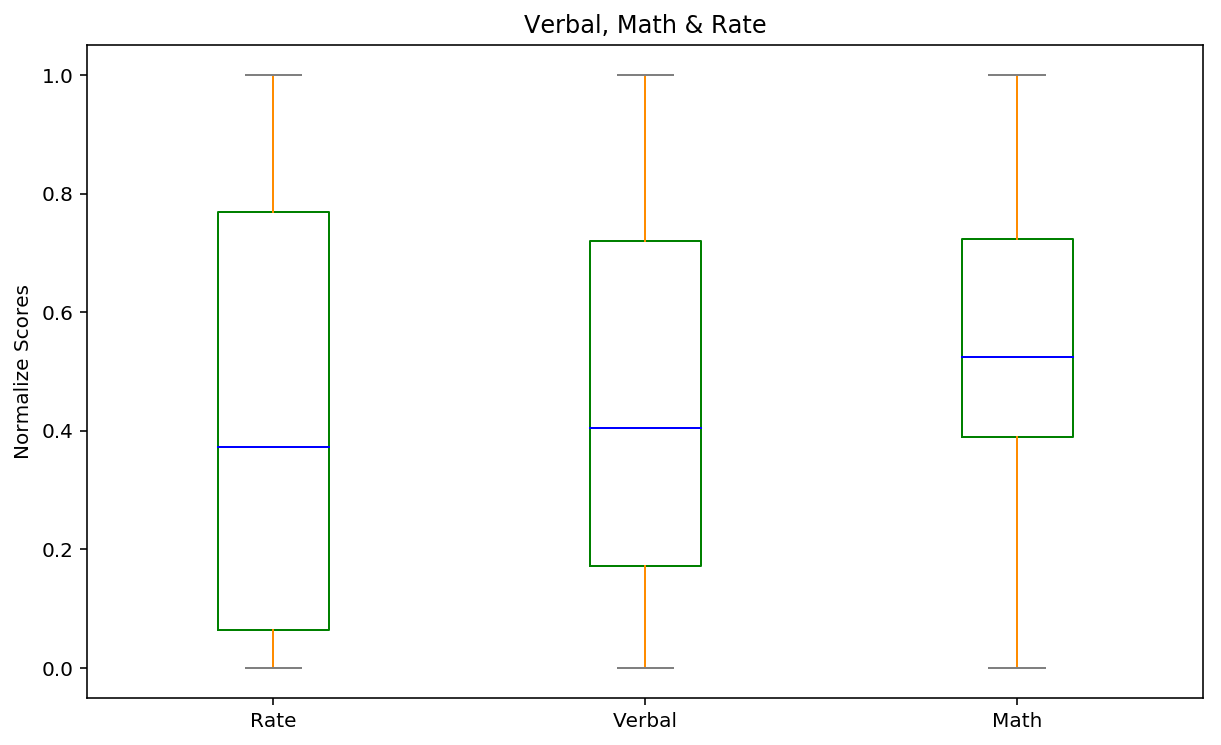

In [35]:
df_scale[['Rate', 'Verbal', 'Math']].plot(kind='box', title='Verbal, Math & Rate', legend=True, color=box_plot_colour, figsize=(10,6))
plt.ylabel('Normalize Scores')

In [37]:
# normalization using z-score

df_zscore = df.copy()

def normalization_zscore(name):
    df_zscore[name] = stats.zscore(df_zscore[name])
    return df_zscore

normalization_zscore('Rate')
normalization_zscore('Verbal')
normalization_zscore('Math')

df_zscore.head()

,State,Rate,Verbal,Math
0,CT,1.649606,-0.712322,-0.607938
1,NJ,1.612948,-1.015059,-0.524442
2,MA,1.539632,-0.651775,-0.468778
3,NY,1.466317,-1.136154,-0.747098
4,NH,1.283027,-0.379312,-0.440946


Text(0,0.5,u'Standardized Scores')

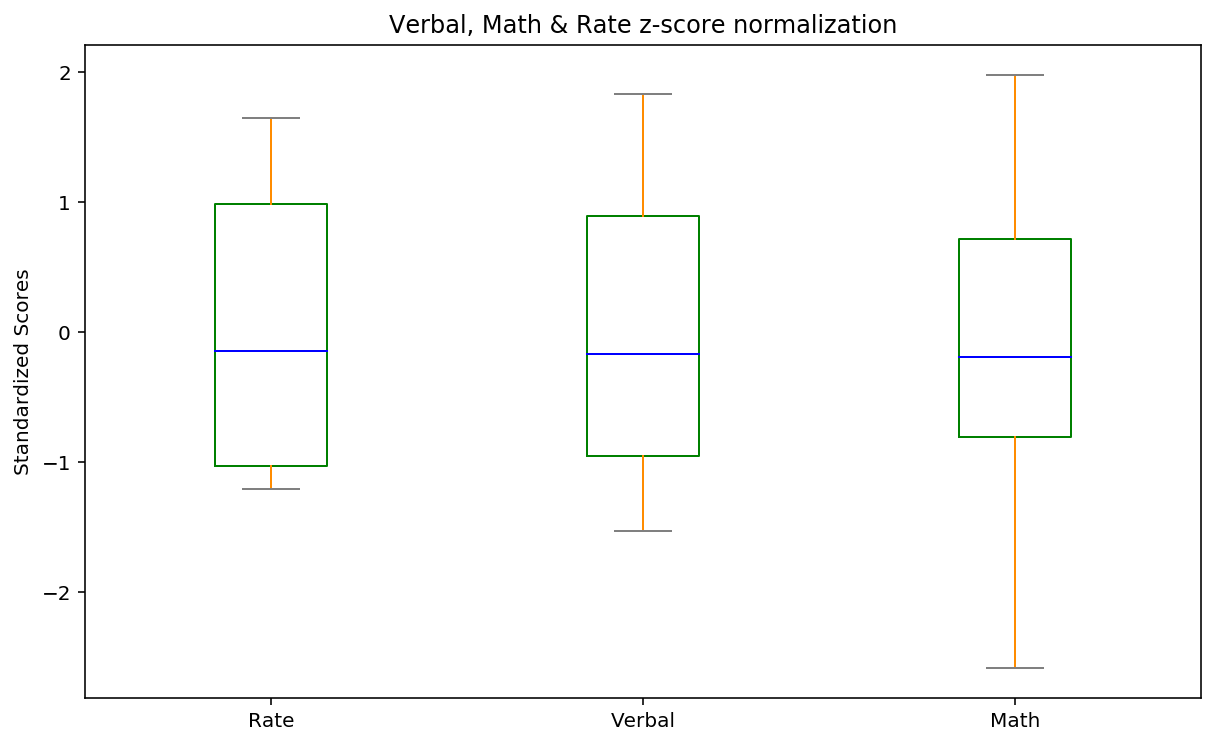

In [39]:
df_zscore[['Rate', 'Verbal', 'Math']].plot(kind='box', title='Verbal, Math & Rate z-score normalization', legend=True, color=box_plot_colour, figsize=(10,6))
plt.ylabel('Standardized Scores')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [40]:
# mean Verbal scores

df_mean1 = df.loc[:, ['Verbal']].mean()
df_mean1

Verbal    532.529412
dtype: float64

In [47]:
# median Verbal scores

df_median1 = df.loc[:, ['Verbal']].median()
df_median1

Verbal    527.0
dtype: float64

In [46]:
# Number of States above mean for Verbal column

df[df.loc[:, ['Verbal']] > df_mean1][['Verbal']].count()

Verbal    24
dtype: int64

In [32]:
# to check how many states are lesser than the mean

df[df.loc[:, ['Verbal']] < df_mean1][['Verbal']].count()

Verbal    27
dtype: int64

There is a total of 51 states. 24 states are above the mean while the remaining 27 states are below the mean. This would indicate that that the 'Verbal' distribution is slightly skewed to the right, where mean > median. Calculating the median in Q5.2 would further prove this to be true

A histrogram is plotted below to confirm this findings.

In [49]:
# also done without using .loc function in pandas

df_mean = df['Verbal'].mean()
df_mean

532.5294117647059

In [50]:
df[df['Verbal'] > df_mean][['Verbal','State']].count()

Verbal    24
State     24
dtype: int64

In [51]:
df[df['Verbal'] <= df_mean][['Verbal','State']].count()

Verbal    27
State     27
dtype: int64

Text(0.5,0,u'Verbal Scores')

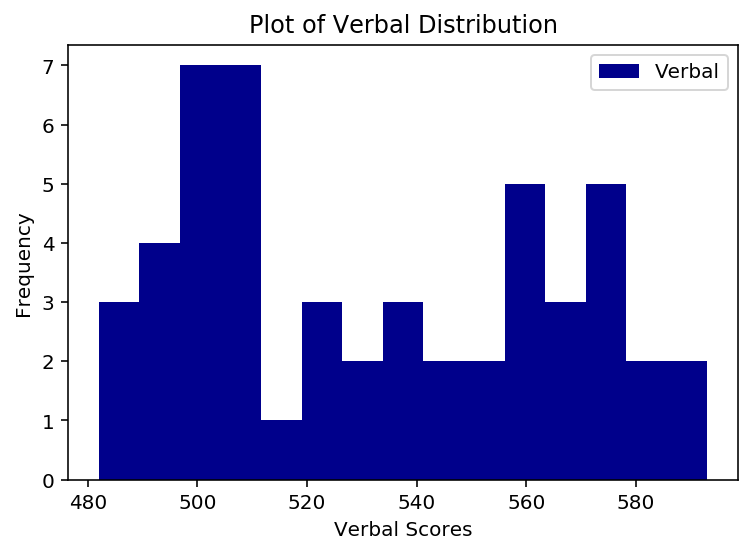

In [57]:
# histogram 1
df['Verbal'].plot(kind='hist', title='Plot of Verbal Distribution', legend=True, color='DarkBlue', bins=15)
plt.xlabel('Verbal Scores')

Text(0.5,0,u'Verbal Scores')

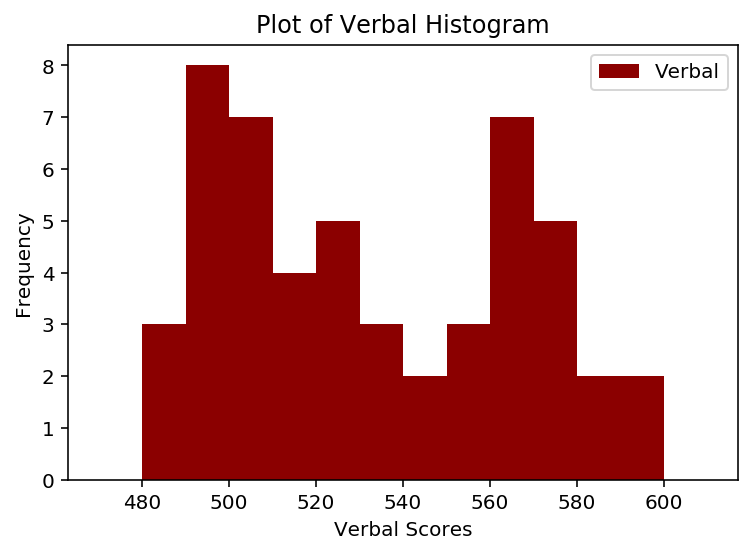

In [58]:
# histogram 2 - plotting with the defined min and max points in historgram

bin_values = np.arange(start=470, stop=620, step=10)
df['Verbal'].plot(kind='hist', title='Plot of Verbal Histogram', legend=True, color='DarkRed', bins=bin_values)
plt.xlabel('Verbal Scores')

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [60]:
df_median = df['Verbal'].median()
df_median

527.0

In [61]:
df[df['Verbal'] > df_median][['Verbal','State']].count()

Verbal    24
State     24
dtype: int64

In [98]:
df_higher_median = df[df['Verbal'] > df_median][['State', 'Rate', 'Verbal', 'Math']]
df_higher_mean = df[df['Verbal'] > df['Verbal'].mean()][['State', 'Rate', 'Verbal', 'Math']]

In [99]:
df_higher_median.shape

(24, 4)

In [100]:
df_higher_mean.shape

(24, 4)

24 out of 51 states are above the median. This means that the distribution is slightly skewed to the right.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [101]:
df_verbal_less_math = df.copy()
df_verbal_less_math['Verbal - Math'] = df['Verbal'] - df['Math']
df_verbal_less_math.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [103]:
# sorting 'Verbal - 'Math' columns based on descending order.

df_vlm_top_10 = df_verbal_less_math.sort_values(['Verbal - Math'], ascending=False).reset_index().iloc[:10]
df_vlm_top_10

,index,State,Rate,Verbal,Math,Verbal - Math
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15
3,45,AR,6,562,550,12
4,31,TN,13,562,553,9
5,9,VA,68,510,501,9
6,32,NM,13,551,542,9
7,16,DC,56,482,474,8
8,8,ME,69,506,500,6
9,41,OK,8,567,561,6


In [104]:
# getting the top 3 states based on Verbal - Math

df_vlm_top_10.head(3)

,index,State,Rate,Verbal,Math,Verbal - Math
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


In [106]:
# using the same table above, taking the last 10 rows for 'Math' - 'Verbal' where Math > Verbal. However, this is in 
# descending order.

df_vlm_bottom_10 = df_verbal_less_math.sort_values(['Verbal - Math'], ascending=False).reset_index().iloc[len(df['Verbal'])-10:]
df_vlm_bottom_10

,index,State,Rate,Verbal,Math,Verbal - Math
41,49,ND,4,592,599,-7
42,37,MN,9,580,589,-9
43,3,NY,77,495,505,-10
44,47,IA,5,593,603,-10
45,36,MI,11,561,572,-11
46,44,WI,6,584,596,-12
47,33,IL,12,576,589,-13
48,1,NJ,81,499,513,-14
49,23,CA,51,498,517,-19
50,21,HI,52,485,515,-30


In [107]:
# using .tail(3) to retrieve the last 3 for Math - Verbal. Order is in descending order as values are negative.

df_vlm_bottom_10.tail(3)

,index,State,Rate,Verbal,Math,Verbal - Math
48,1,NJ,81,499,513,-14
49,23,CA,51,498,517,-19
50,21,HI,52,485,515,-30


In [108]:
# 2nd Method for Q2
# creating a new table with column 'Math' - 'Verbal'

df_math_less_verbal = df.copy()

df_math_less_verbal['Math - Verbal'] = df['Math']-df['Verbal']
df_math_less_verbal.head()

,State,Rate,Verbal,Math,Math - Verbal
0,CT,82,509,510,1
1,NJ,81,499,513,14
2,MA,79,511,515,4
3,NY,77,495,505,10
4,NH,72,520,516,-4


In [109]:
#sorting column 'Math' - 'Verbal' based on descending order to the get top 3 for Math > Verbal

df_mlv_top_10 = df_math_less_verbal.sort_values(['Math - Verbal'], ascending=False).reset_index().iloc[:10]
df_mlv_top_10

,index,State,Rate,Verbal,Math,Math - Verbal
0,21,HI,52,485,515,30
1,23,CA,51,498,517,19
2,1,NJ,81,499,513,14
3,33,IL,12,576,589,13
4,44,WI,6,584,596,12
5,36,MI,11,561,572,11
6,3,NY,77,495,505,10
7,47,IA,5,593,603,10
8,37,MN,9,580,589,9
9,49,ND,4,592,599,7


In [110]:
# getting the top 3 states based on Math - Verbal

df_mlv_top_10.head(3)

,index,State,Rate,Verbal,Math,Math - Verbal
0,21,HI,52,485,515,30
1,23,CA,51,498,517,19
2,1,NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [111]:
df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


Rate and Verbal - Strong negative correlation at -0.89. <br>
Rate and Math - Strong negative correlation at -0.77. <br>
Verbal and Math - Strong correlation at 0.9.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [51]:
df.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


There is a total of 51 unique counts / rows for Rate, Verbal and Math.

Mean: Average of all the states for all variables.

Std: Standard deviation of each variable. It measures how far is the min and max values away from the mean.

Min: The minimum value of each variable

25%: 1st quartile. 25% percentile value of each variable

50%: 2nd quartile. 50% percentile or median value of each variable

75%: 3rd quartile. 75% percentile value of each variable

Max: The maximum value of each variable



#### Describing each variable based on each function of .describe
Mean for Rate is at 37.2% with a std dev of 27.3%. The lowest passing rate is 4% while highest passing rate is 82%.
25th, 50th and 75th percentile Rates are at 9%, 33.5% and 63.5% respectively.

Mean for Verbal is at 532 with a std dev of 33.2. The lowest score is 482 while highest score is 593 (assuming out of 800).
25th, 50th and 75th percentile scores are at 501, 526.5 and 562 respectively.

Mean for Math is at 531.5 with a std dev of 36.0. The lowest score is 439 while highest score is 603.
25th, 50th and 75th percentile scores are at 504, 521 and 555.75 respectively.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [112]:
df.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


Correlation measures the relationship to which two variables tend to change together. It also measures the strength and direction of the relationship.

A positive correlation would indicate that the 2 attributes would move in the same direction in the axis. For instance, X and Y have a positive correlation. If value of X increase, value of Y will increase.

On the other hand, a negative correlation would indicate that the 2 attributes would move in the opposite direction on the axis.
For instance, X1 and Y1 have a negative correlation. If value of X1 increase, value of Y1 will decrease.

Value of correlation takes place between -1 and +1. A 0 correlation indicates that the 2 variables are not related. A coefficient that is closer to -1 or 1 would indicate that the 2 variables have a strong relationship.

Covariance is when two items vary together.

Value of covariance lies between - $∞$ and + $∞$.

We can normalize covariance by dividing the standard deviation of the samples.

http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_5.html

Correlation measures how strong 2 variables are related but correlation only measures the extent to which 2 random variables change in tandem.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [113]:
df_drugs = pd.read_csv('./drug-use-by-age.csv')
df_drugs.sample(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0


The "drugs use by age" data would require cleaning. There are some columns, which the rows are left as '-'.
Furthermore, the 'age' column are not standardized, where some rows are individual integers, while others are maintained as
an age range - 26-29. This would give an inccurate analysis.

In [114]:
df_drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [55]:
df_drugs.info()

# there are a few columns that are objects instead of float or int.
# age=object?
# cocaine-frequency = float
# crack-frequency = float
# heroin-frequency = float
# inhalant-frequency = float
# all should be float
# missing columns for those columns that are object. the table above shows those columns that are either a float or integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [115]:
# checking the unique values of the columns that are object instead of float

df_drugs['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [116]:
df_drugs['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [117]:
df_drugs['crack-frequency'].unique()

array(['-', '3.0', '9.5', '1.0', '21.0', '10.0', '2.0', '5.0', '17.0',
       '6.0', '15.0', '48.0', '62.0'], dtype=object)

In [118]:
df_drugs['heroin-frequency'].unique()

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'],
      dtype=object)

In [119]:
df_drugs['inhalant-frequency'].unique()

array(['19.0', '12.0', '5.0', '5.5', '3.0', '4.0', '2.0', '3.5', '10.0',
       '13.5', '-'], dtype=object)

In [120]:
df_drugs['oxycontin-frequency'].unique()

array(['24.5', '41.0', '4.5', '3.0', '4.0', '6.0', '7.0', '7.5', '12.0',
       '13.5', '17.5', '20.0', '46.0', '5.0', '-'], dtype=object)

In [121]:
df_drugs['meth-frequency'].unique()

array(['-', '5.0', '24.0', '10.5', '36.0', '48.0', '12.0', '105.0', '2.0',
       '46.0', '21.0', '30.0', '54.0', '104.0'], dtype=object)

In [122]:
df_drugs_new = df_drugs.copy()

def clean_data(col_name):
    new_lst1 = [float(np.nan) if num == '-' else float(num) for num in df_drugs_new[col_name]]
    df_drugs_new[col_name] = new_lst1
    return df_drugs_new

clean_data('cocaine-frequency')
clean_data('crack-frequency')
clean_data('heroin-frequency')
clean_data('inhalant-frequency')
clean_data('oxycontin-frequency')
clean_data('meth-frequency')

df_drugs_new.sample(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


In [123]:
df_drugs_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [124]:
# to confirm that the '-' values are NaN

df_drugs_new['cocaine-frequency'].unique()

array([ 5. ,  1. ,  5.5,  4. ,  7. ,  8. ,  6. , 15. , 36. ,  nan])

In [125]:
df_drugs_new['crack-frequency'].unique()

array([ nan,  3. ,  9.5,  1. , 21. , 10. ,  2. ,  5. , 17. ,  6. , 15. ,
       48. , 62. ])

In [126]:
df_drugs_new['heroin-frequency'].unique()

array([ 35.5,   nan,   2. ,   1. ,  66.5,  64. ,  46. , 180. ,  45. ,
        30. ,  57.5,  88. ,  50. ,  66. , 280. ,  41. , 120. ])

In [127]:
df_drugs_new['inhalant-frequency'].unique()

array([19. , 12. ,  5. ,  5.5,  3. ,  4. ,  2. ,  3.5, 10. , 13.5,  nan])

In [128]:
df_drugs_new['oxycontin-frequency'].unique()

array([24.5, 41. ,  4.5,  3. ,  4. ,  6. ,  7. ,  7.5, 12. , 13.5, 17.5,
       20. , 46. ,  5. ,  nan])

In [129]:
df_drugs_new['meth-frequency'].unique()

array([  nan,   5. ,  24. ,  10.5,  36. ,  48. ,  12. , 105. ,   2. ,
        46. ,  21. ,  30. ,  54. , 104. ])

In [130]:
df_drugs_new.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [132]:
df_drugs_new[(df_drugs_new['cocaine-frequency'].isnull() > 0)][['age', 'cocaine-use', 'cocaine-frequency']]

,age,cocaine-use,cocaine-frequency
16,65+,0.0,NaN


In [133]:
df_drugs_new[(df_drugs_new['heroin-frequency'].isnull() > 0)][['age', 'heroin-use', 'heroin-frequency']]

,age,heroin-use,heroin-frequency
1,13,0.0,NaN


In [134]:
df_drugs_new[df_drugs_new['crack-frequency'].isnull() > 0][['age', 'crack-use', 'crack-frequency']]

,age,crack-use,crack-frequency
0,12,0.0,NaN
2,14,0.0,NaN
16,65+,0.0,NaN


In [135]:
df_drugs_new[(df_drugs_new['inhalant-frequency'].isnull() > 0)][['age', 'inhalant-use', 'inhalant-frequency']]

,age,inhalant-use,inhalant-frequency
16,65+,0.0,NaN


In [136]:
df_drugs_new[df_drugs_new['oxycontin-frequency'].isnull() > 0][['age', 'oxycontin-use', 'oxycontin-frequency']]

,age,oxycontin-use,oxycontin-frequency
16,65+,0.0,NaN


In [137]:
df_drugs_new[(df_drugs_new['meth-frequency'].isnull() > 0)][['age', 'meth-use', 'meth-frequency']]

,age,meth-use,meth-frequency
0,12,0.0,NaN
16,65+,0.0,NaN


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

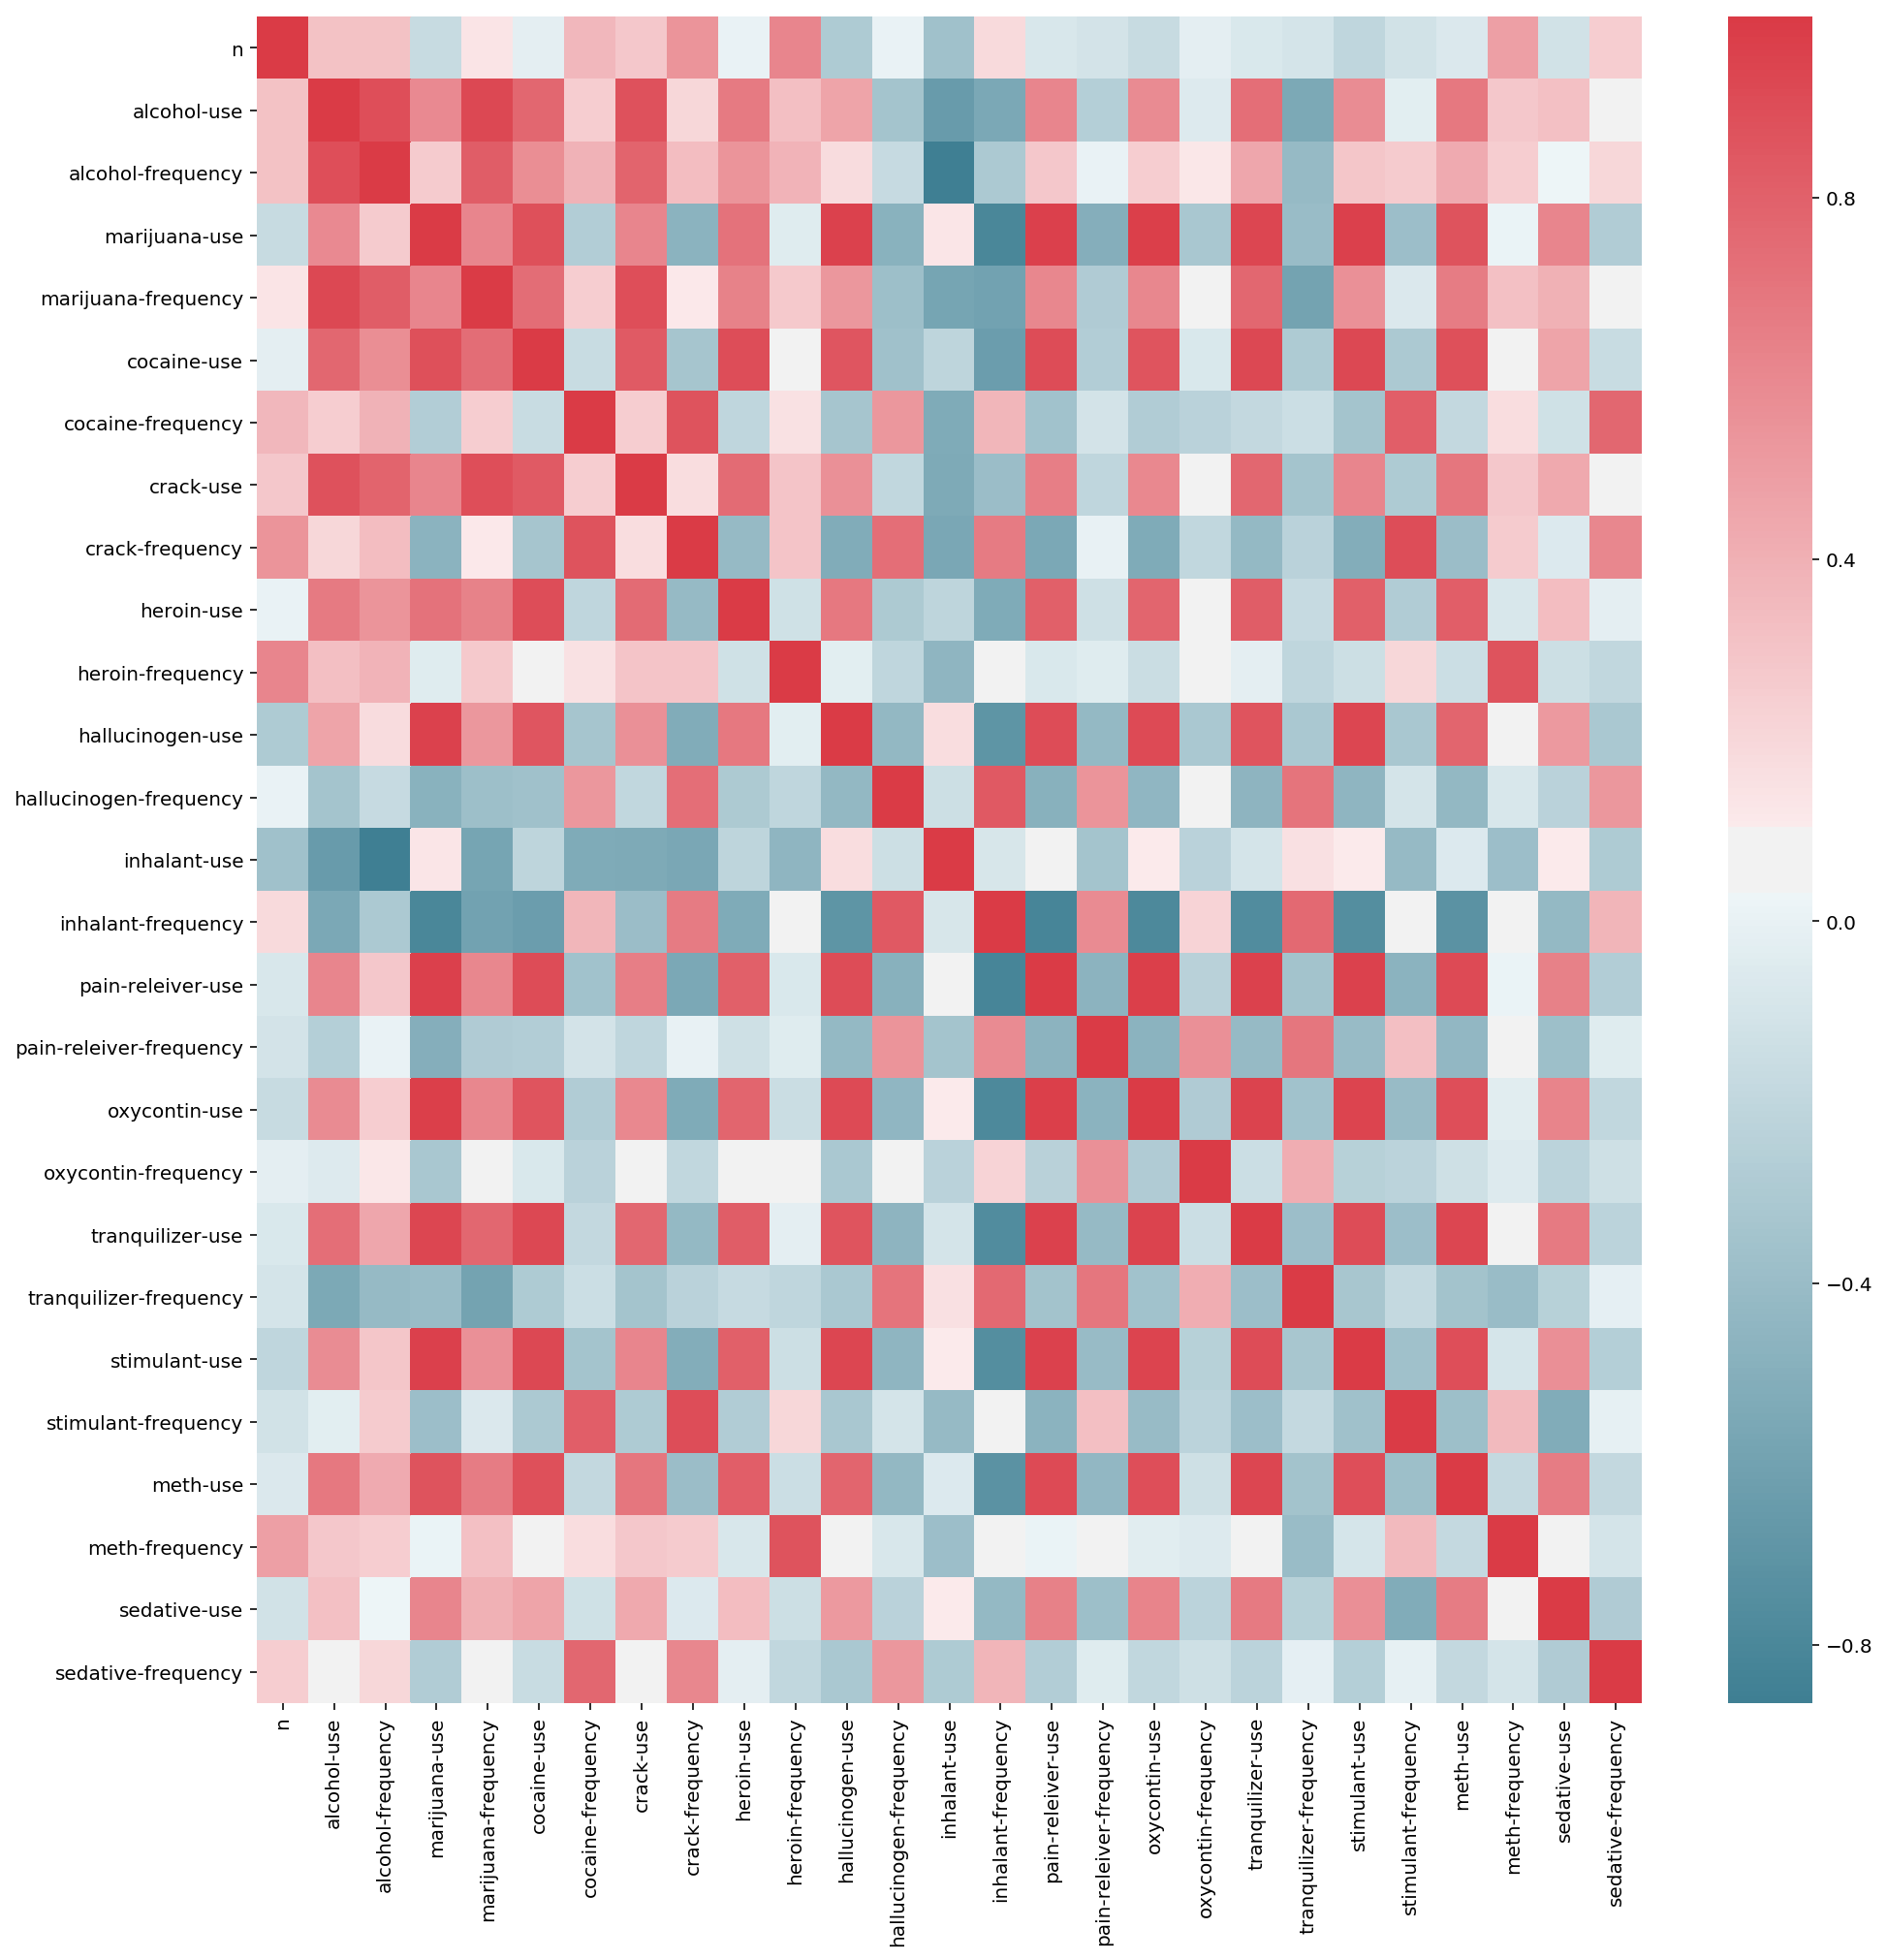

In [138]:
plt.figure(figsize=(16,16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_drugs_new.corr(), cmap=cmap)

In [139]:
df_drugs_new.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.166039,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708


In [140]:
df_drugs_new_use = df_drugs_new[['age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use',
                       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use',
                      'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]

In [141]:
df_drugs_new_use.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [142]:
df_drugs_new_use.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [143]:
melted_df_drugs_use = pd.melt(df_drugs_new_use, id_vars=['age'], var_name='drugs')
melted_df_drugs_use.head()

,age,drugs,value
0,12,alcohol-use,3.9
1,13,alcohol-use,8.5
2,14,alcohol-use,18.1
3,15,alcohol-use,29.2
4,16,alcohol-use,40.1


[Text(0,0.5,u'Percentage of those in age group who used substance in the past 12 months'),
 Text(0.5,0,u'Drugs')]

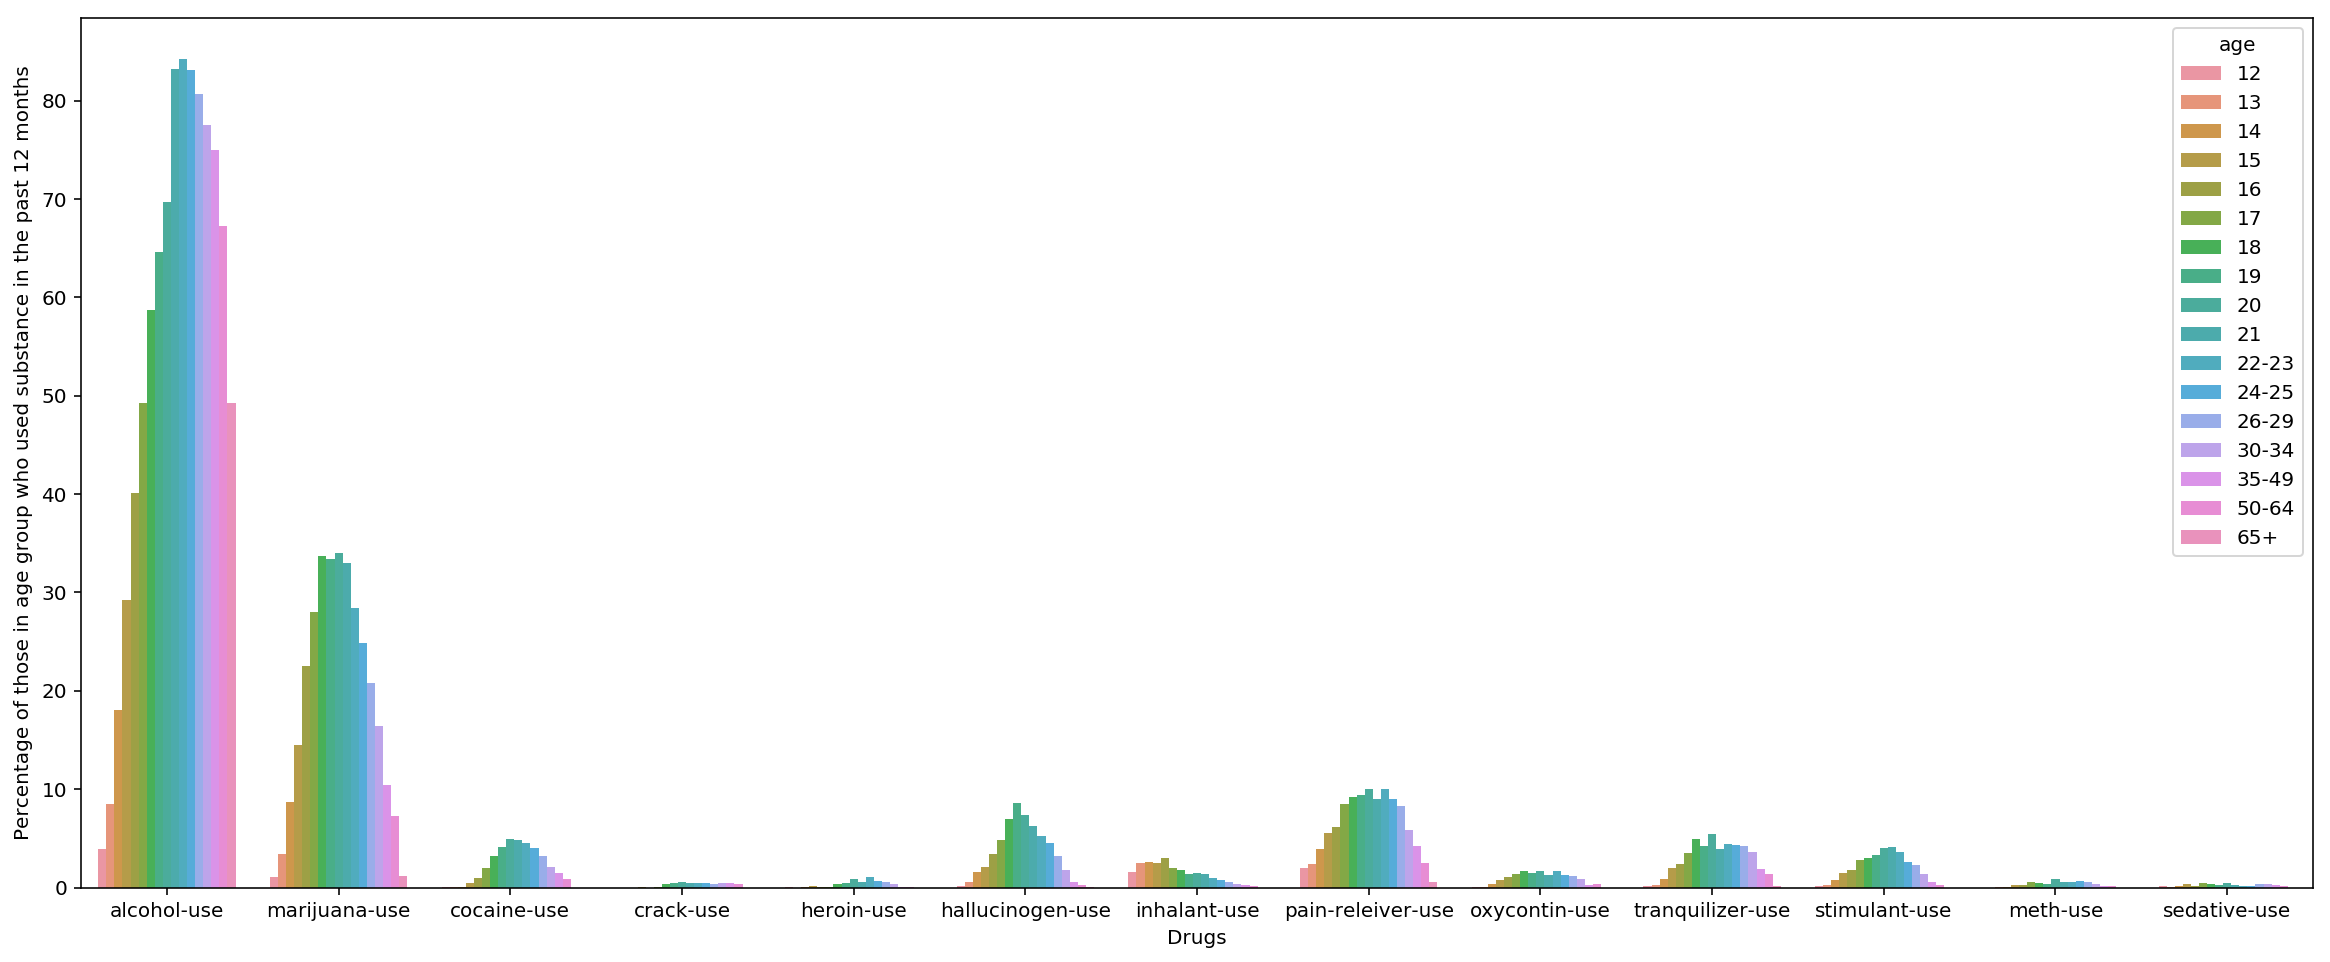

In [144]:
plt.figure(figsize=(20,8))
sns.barplot(data=melted_df_drugs_use, hue='age', x='drugs', y='value').set(xlabel='Drugs', ylabel='Percentage of those in age group who used substance in the past 12 months')

We see that alcohol use has the highest useage compared to the rest of the drugs. Generally we see that the useage of drugs are peak in their 20's and decrease when they get older.

[Text(0,0.5,u'%'), Text(0.5,0,u'Drugs'), Text(0.5,1,u'Useage of Drugs')]

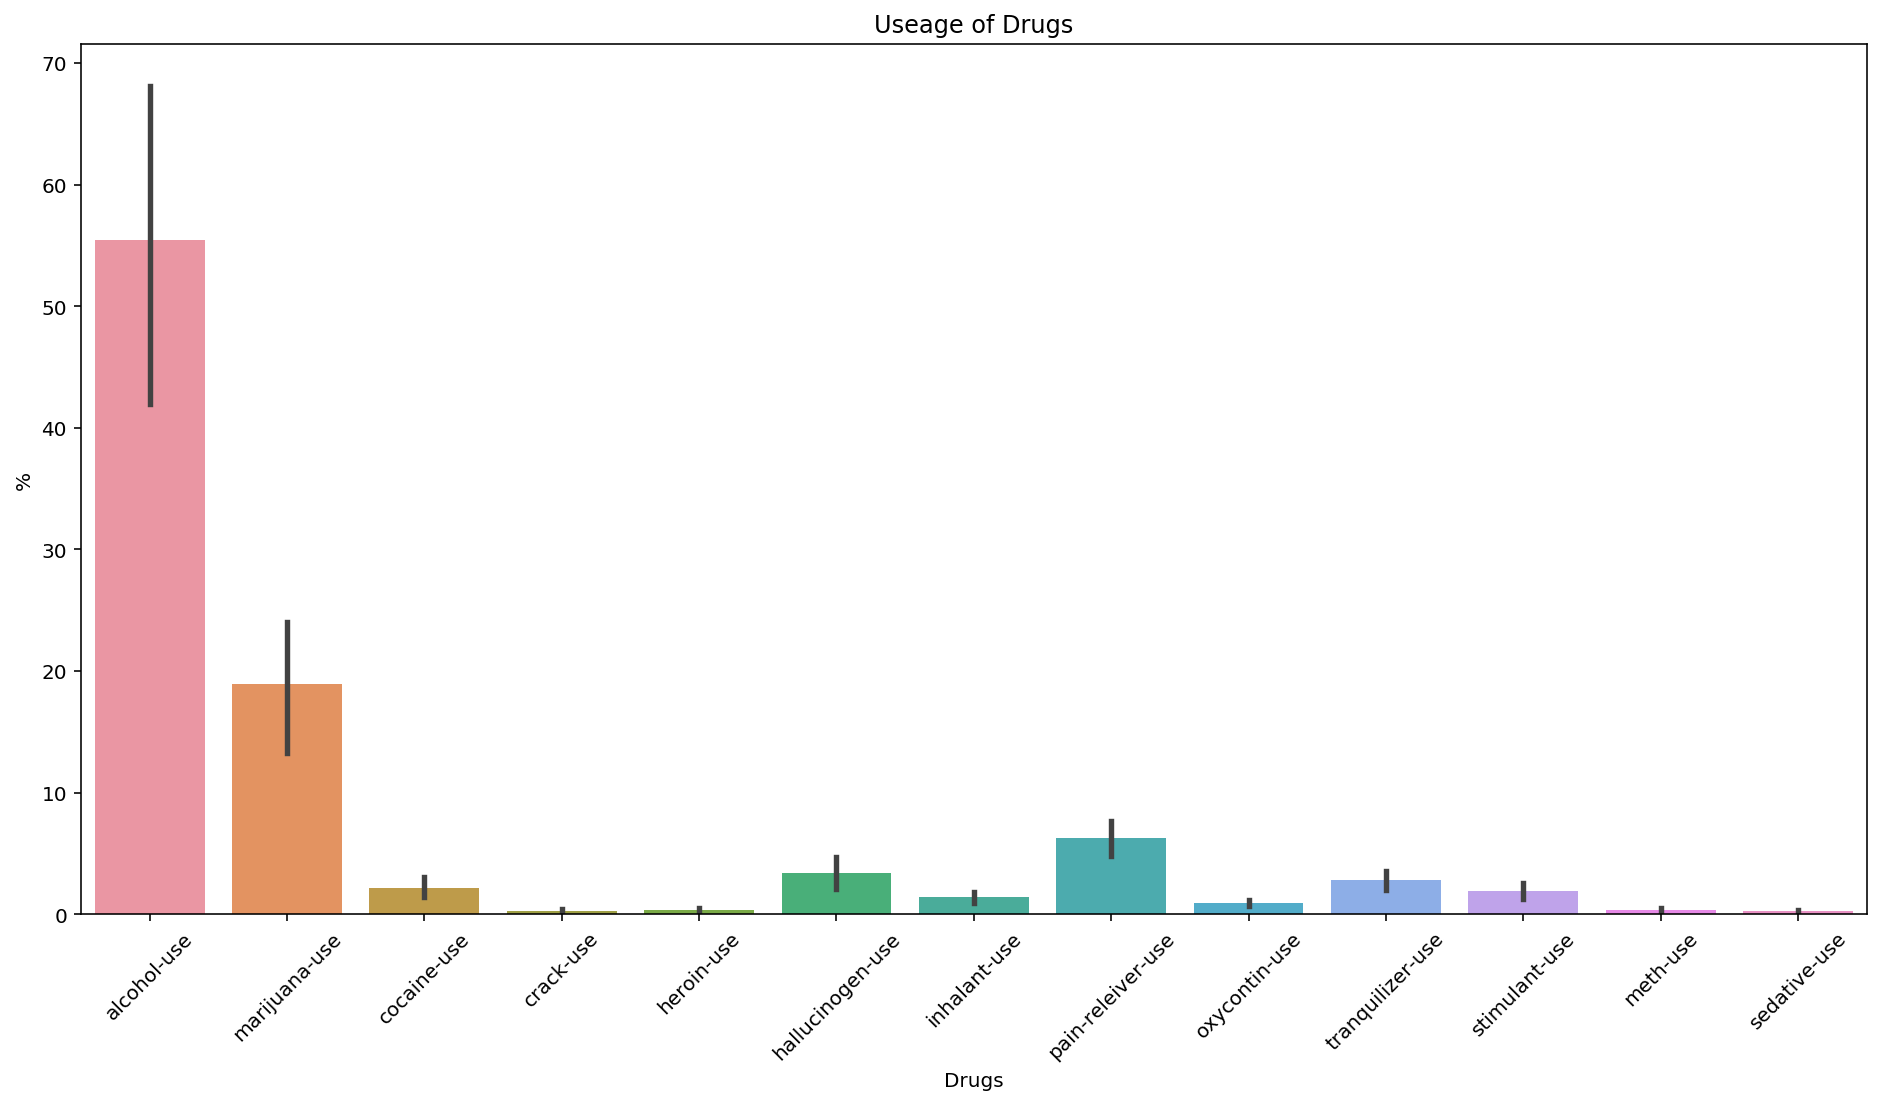

In [146]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(data=df_drugs_new_use).set(xlabel='Drugs', title='Useage of Drugs', ylabel='%')

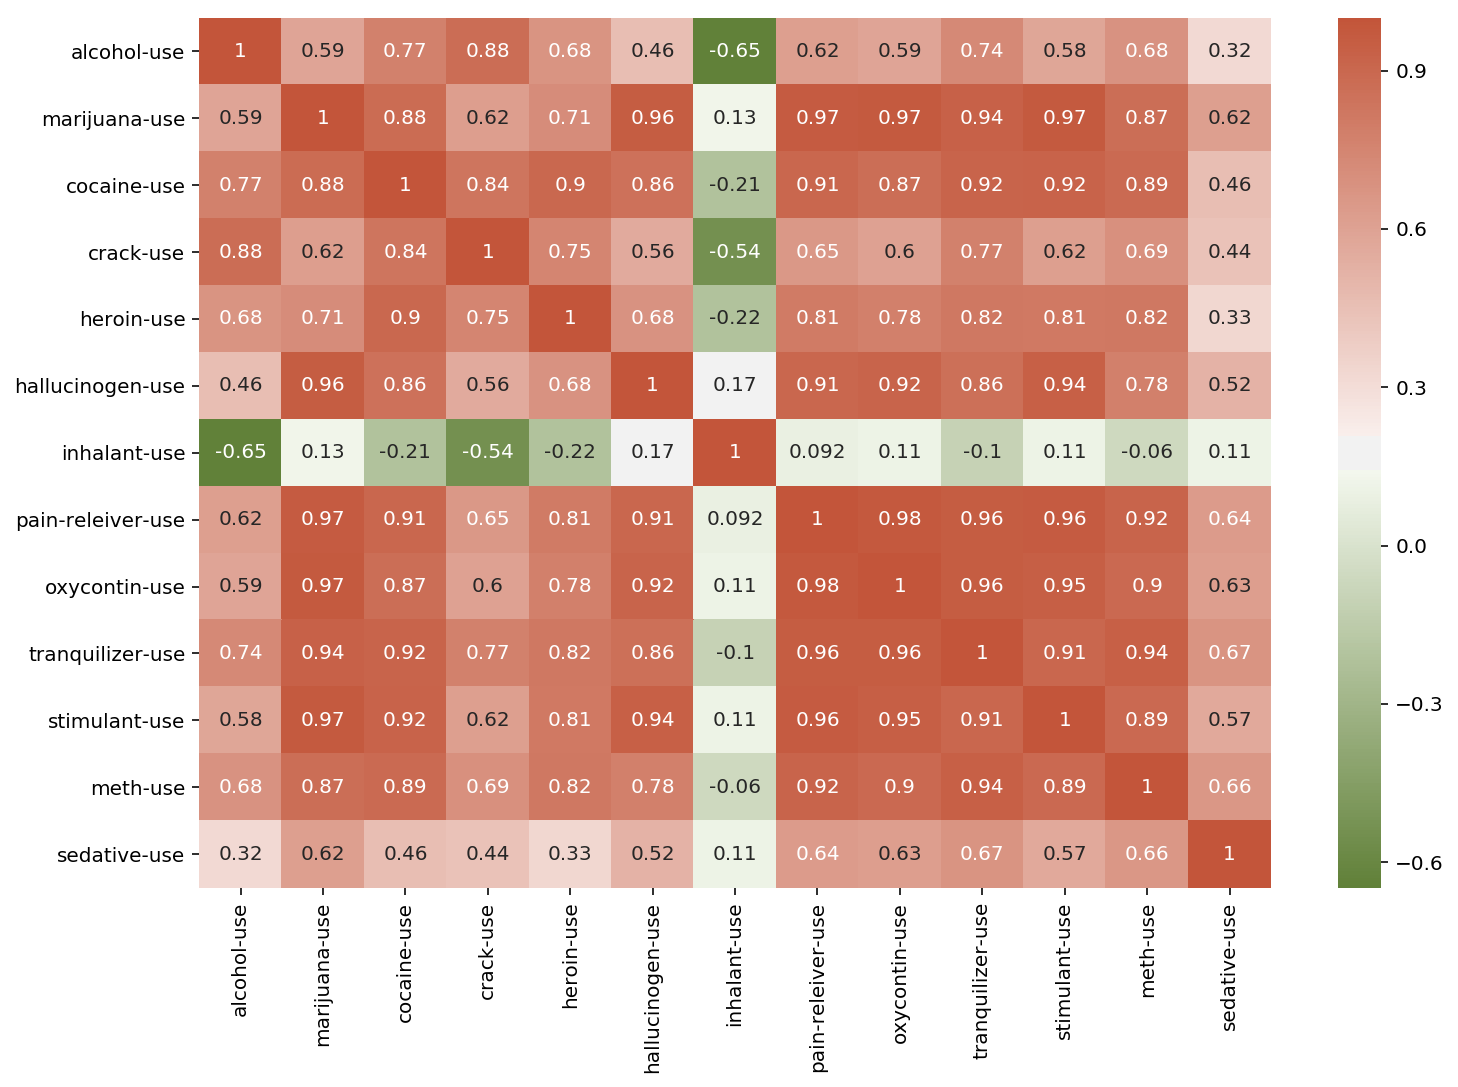

In [147]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(110, 20, as_cmap=True)
sns.heatmap(df_drugs_new_use.corr(), annot=True, cmap=cmap)

In [148]:
df_drugs_new_use.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [149]:
df_drugs_new_freq = df_drugs_new[['age', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency',
                       'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency', 
                        'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']]

In [150]:
melted_df_drugs_freq = pd.melt(df_drugs_new_freq, id_vars=['age'], var_name='drugs')
melted_df_drugs_freq.head()

,age,drugs,value
0,12,alcohol-frequency,3.0
1,13,alcohol-frequency,6.0
2,14,alcohol-frequency,5.0
3,15,alcohol-frequency,6.0
4,16,alcohol-frequency,10.0


[Text(0,0.5,u'Frequency'),
 Text(0.5,0,u'Drugs'),
 Text(0.5,1,u'Plot of Drugs Use')]

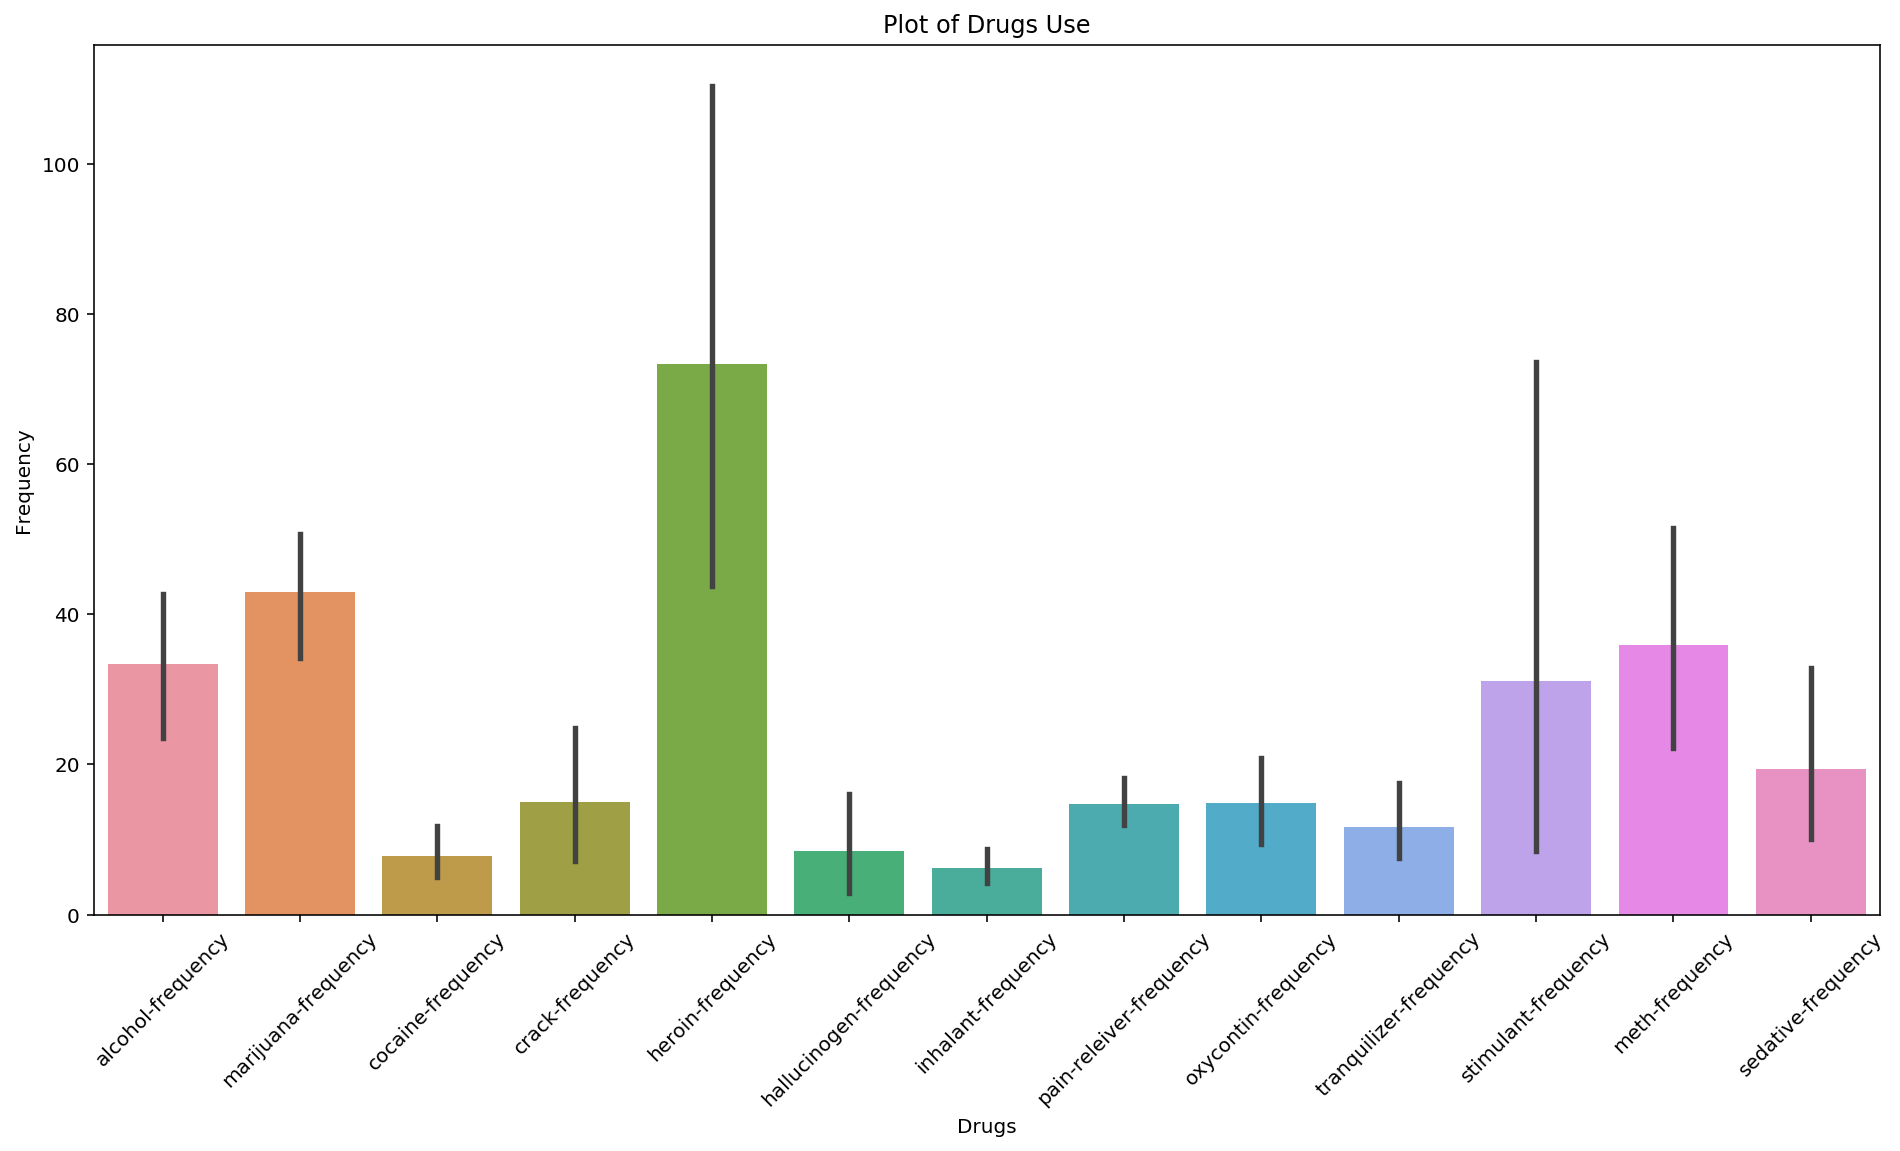

In [151]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(data=df_drugs_new_freq).set(xlabel='Drugs', title='Plot of Drugs Use', ylabel='Frequency')

[Text(0,0.5,u'Median number a user in age group used substance in the past 12 months'),
 Text(0.5,0,u'Drugs'),
 Text(0.5,1,u'Plot of Drugs Useage')]

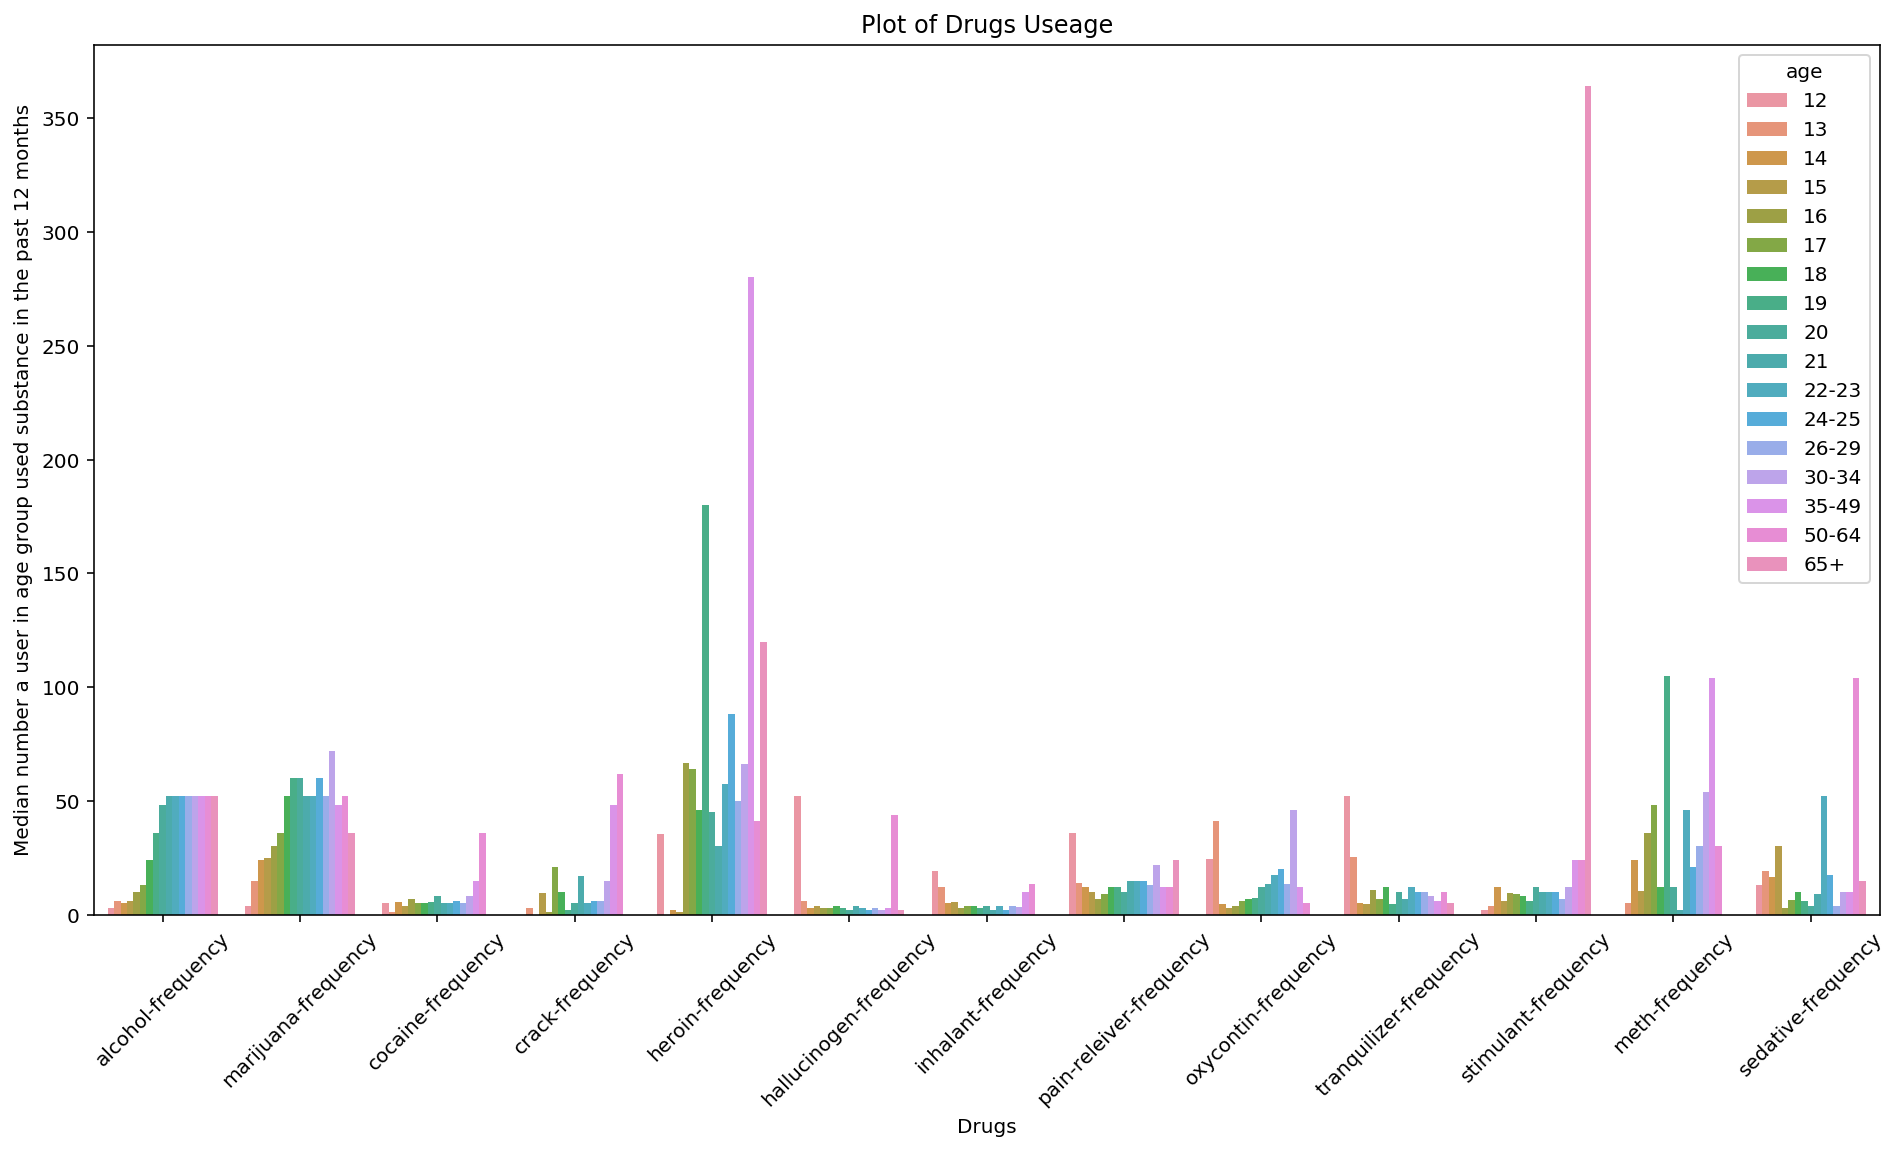

In [153]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(data=melted_df_drugs_freq, hue='age', x='drugs', y='value').set(xlabel='Drugs', ylabel='Median number a user in age group used substance in the past 12 months', title='Plot of Drugs Useage')

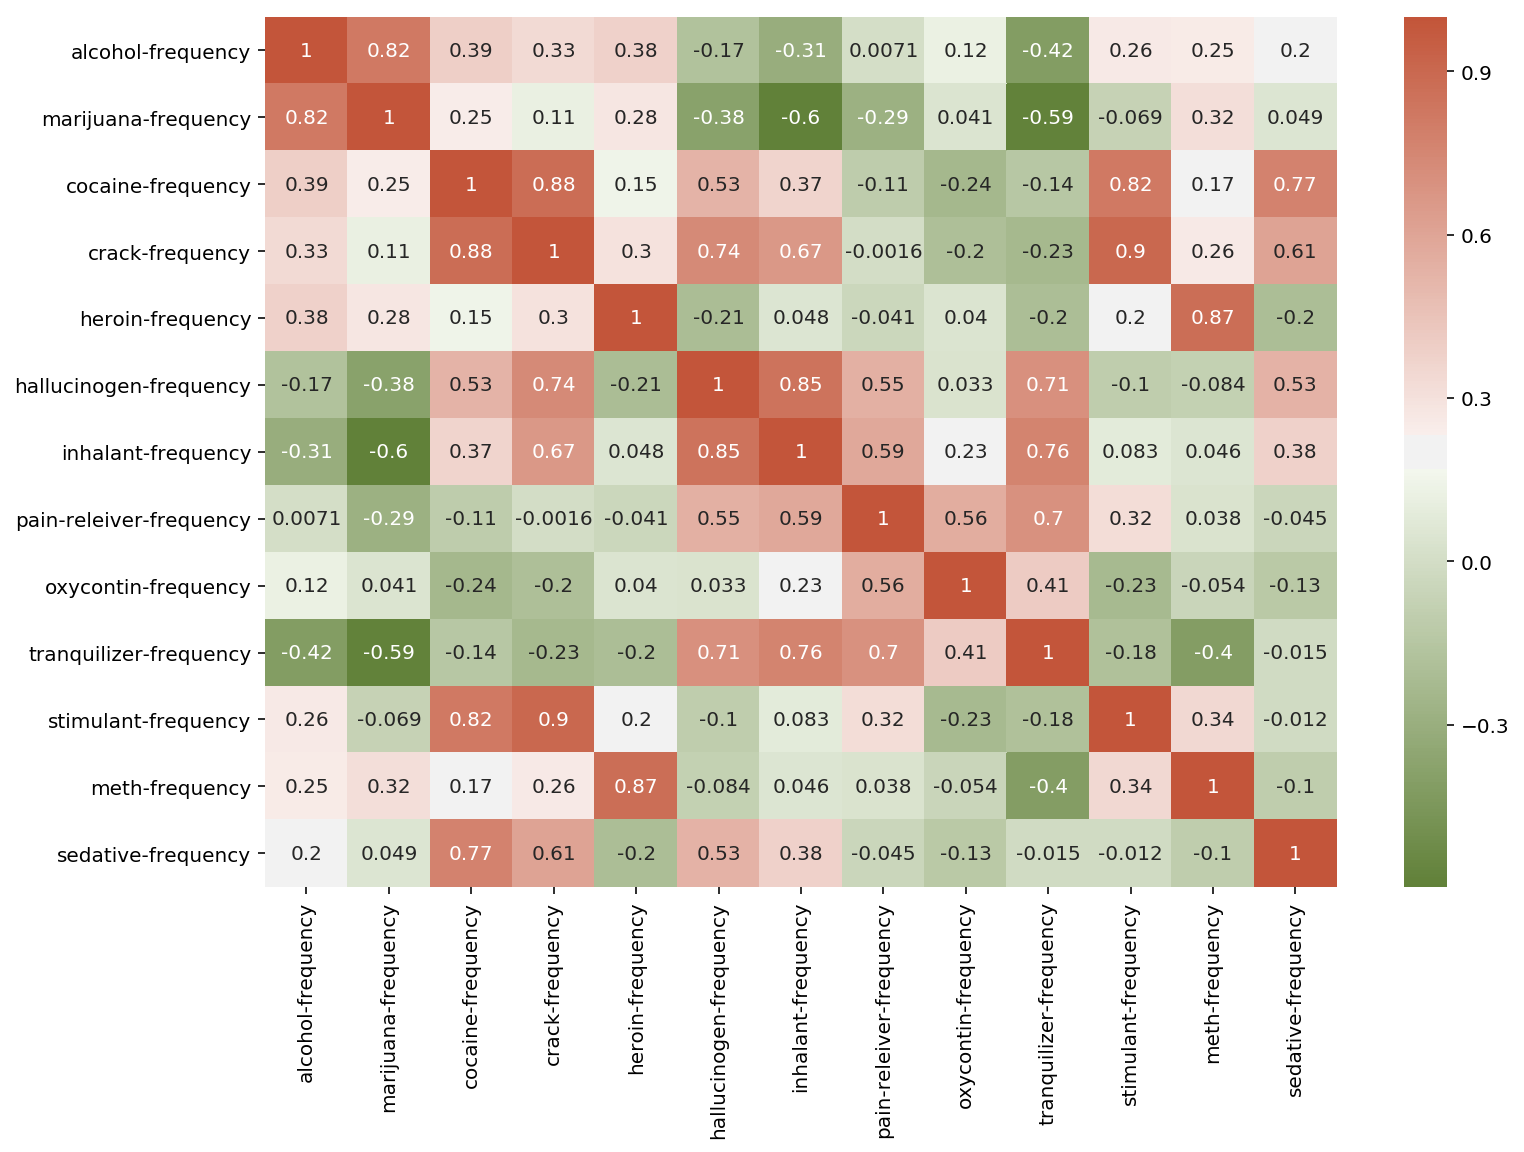

In [154]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(110, 20, as_cmap=True)
sns.heatmap(df_drugs_new_freq.corr(), annot=True , cmap=cmap)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Q: To test if alcohol use have a negative correlation with inhalant use at alpha 0.05

H0: Alcohol has a negative correlation with inhalant

H1: Alcohol does not have a negative correlation with inhalant.

In [155]:
df_drugs_alcohol = df_drugs_new[['age', 'alcohol-use']]
df_drugs_inhalant = df_drugs_new[['age', 'inhalant-use']]

Text(0,0.5,u'Count')

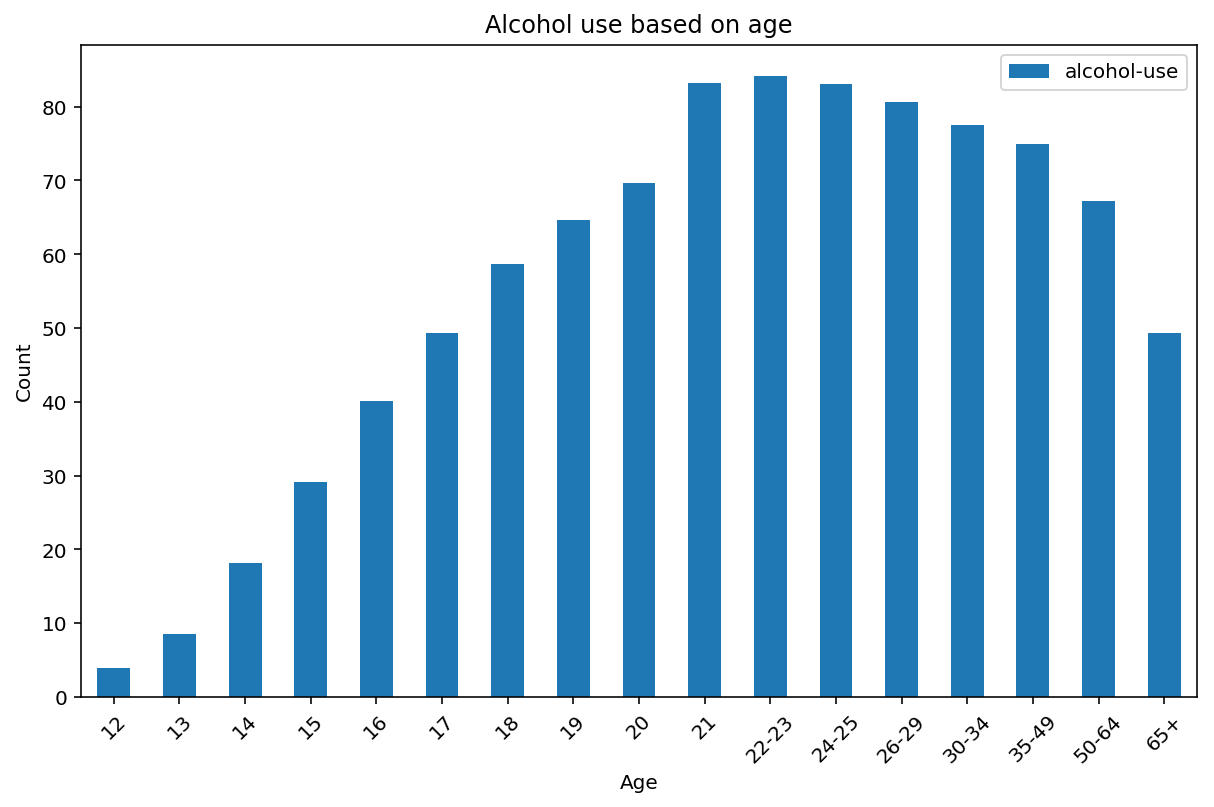

In [160]:
alcohol_plot = df_drugs_alcohol.plot(kind='bar', figsize=(10,6), title='Alcohol use based on age')
alcohol_plot.set_xticklabels(df_drugs_alcohol['age'], rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0,0.5,u'Frequency')

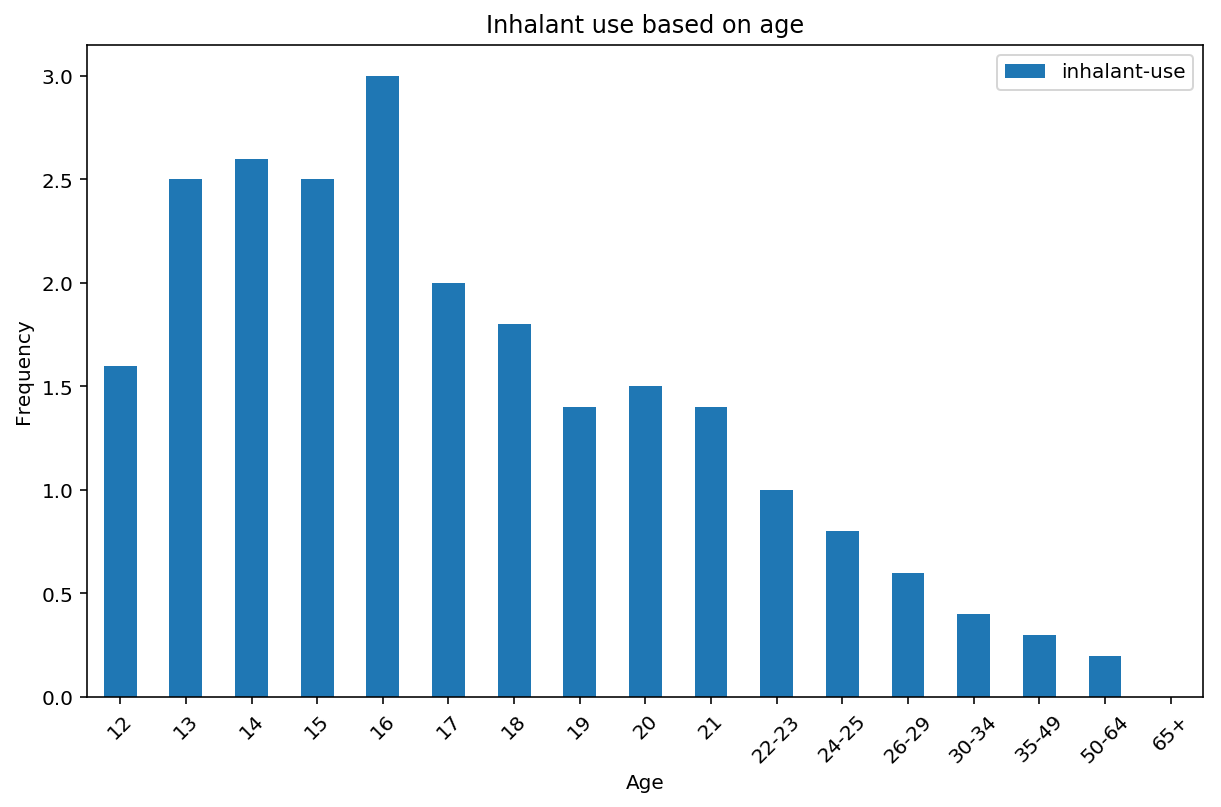

In [159]:
inhalant_plot = df_drugs_inhalant.plot(kind='bar', figsize=(10,6), title='Inhalant use based on age')
inhalant_plot.set_xticklabels(df_drugs_inhalant['age'], rotation=45)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [162]:
stats.ttest_ind(df_drugs_inhalant['inhalant-use'], df_drugs_alcohol['alcohol-use'])

Ttest_indResult(statistic=-8.284761746542873, pvalue=1.82622603895558e-09)

As the pvalue is 1.826e-09, which is lower than our alpha of 0.05, we cannot reject the null hypothesis. Evidence against the null hypothesis is not strong enough

<b> Practicing another test. </b>


Q: To test if marijuana use drops after 22 y/o at alpha 0.05.

H0: Marijuana use drops after 22 y/o.

H1: Marijuana use does not drop after 22 y/o.

In [163]:
df_drugs_marijuana = df_drugs_new[['age', 'marijuana-use']]

In [164]:
df_drugs_marijuana_1 = df_drugs_new[['age', 'marijuana-use', 'marijuana-frequency']]

Text(0,0.5,u'Count')

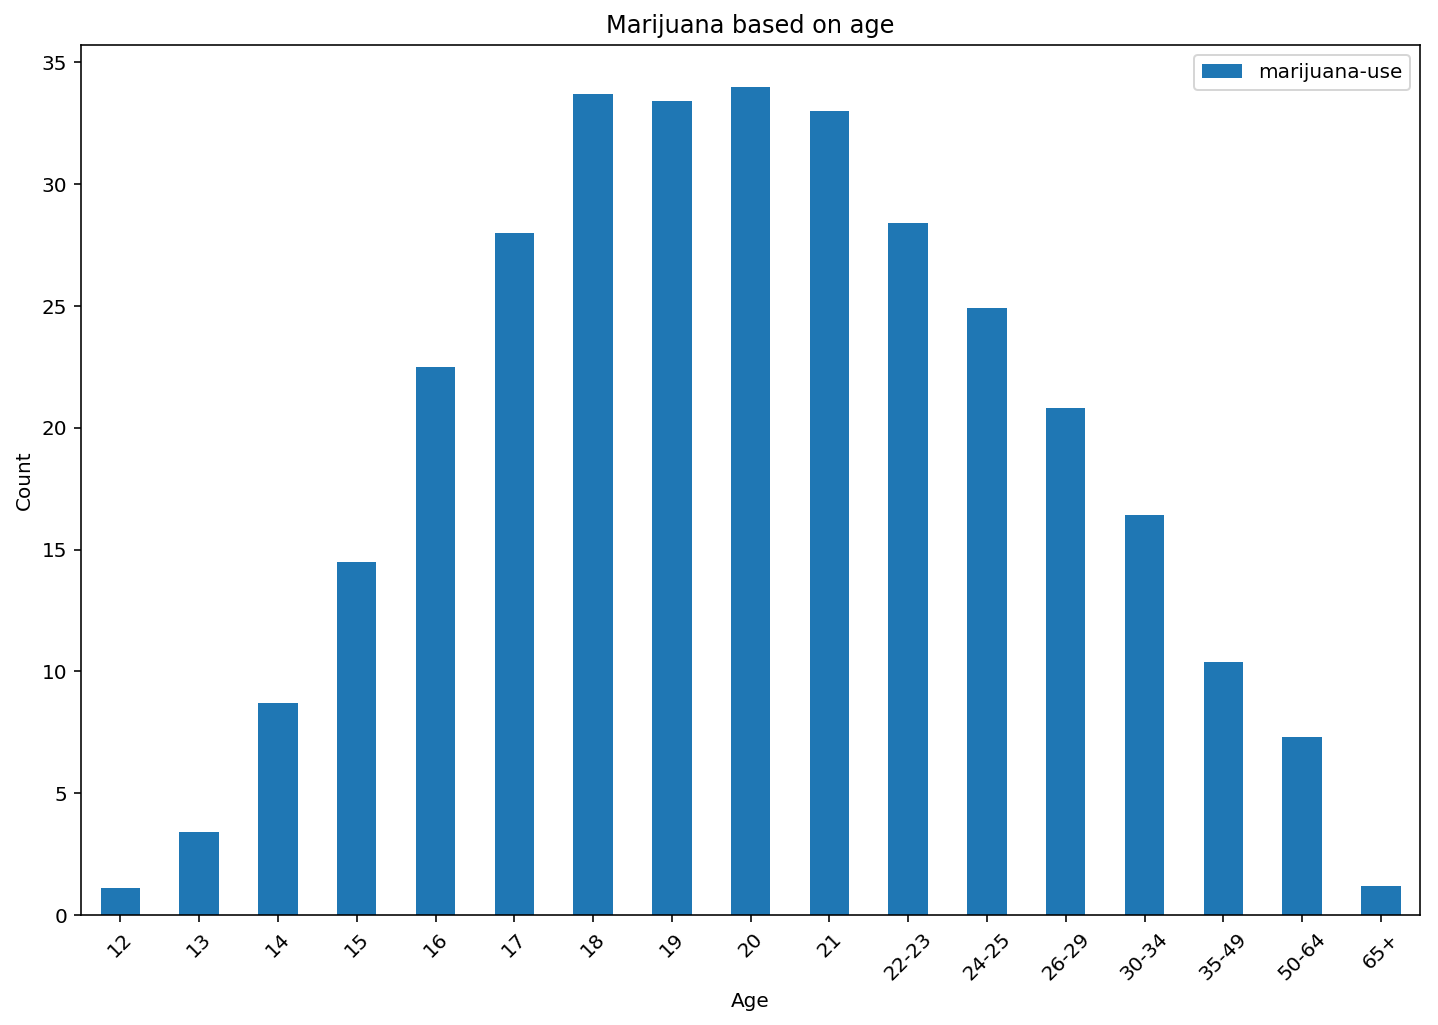

In [166]:
marijuana_plot = df_drugs_marijuana.plot(kind='bar', figsize=(12,8), title='Marijuana based on age')
marijuana_plot.set_xticklabels(df_drugs_marijuana['age'], rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')

In [167]:
df_drugs_marijuana_b22 = df_drugs_marijuana.loc[:9, ['age', 'marijuana-use']]
df_drugs_marijuana_a22 = df_drugs_marijuana.loc[10:, ['age', 'marijuana-use']]

In [168]:
stats.ttest_ind(df_drugs_marijuana_b22['marijuana-use'], df_drugs_marijuana_a22['marijuana-use'])

Ttest_indResult(statistic=0.9473379337420842, pvalue=0.35847954558369244)

As the pvalue is 0.358, which is higher than our alpha of 0.05, we cannot reject the null hypothesis. Evidence against the null hypothesis is not strong enough.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [169]:
df_rate = df[['Rate']]
print 'Original data: Mean is {}. Median is {}. Standard devation is {}.'.format(df_rate['Rate'].mean(), df_rate['Rate'].median(), df_rate['Rate'].std())

Original data: Mean is 37.0. Median is 33.0. Standard devation is 27.5506805724.


In [170]:
df_rate_mean = df_rate.mean()
df_rate_std = df_rate.std()
upper_limit = df['Rate'].mean() + df['Rate'].std()
lower_limit = df['Rate'].mean() - df['Rate'].std()

In [171]:
df_outliers = df[(df['Rate'] > upper_limit) | (df['Rate'] < lower_limit)]
df_outliers

# I have defined outliers as those observations that are more than 1 standard deviation away from Rate mean

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [172]:
df_clean = df.drop(df_outliers.index)
df_clean.head()

,State,Rate,Verbal,Math
13,GA,63,491,489
14,IN,60,499,501
15,SC,57,486,488
16,DC,56,482,474
17,OR,55,526,526


In [173]:
df_clean_mean = df_clean.mean()
df_clean_median = df_clean.median()
df_clean_std = df_clean.std()
print 'New mean: {}, median: {}, standard deviation: {}.' .format(df_clean_mean['Rate'], df_clean_median['Rate'], df_clean_std['Rate'])

New mean: 35.7916666667, median: 33.5, standard deviation: 19.2985225086.


Removal of the outliers have an impact of the mean, median and standard deviation. Mean and standard deviation has dropped while median increased. There is a decrease in standard deviation as the min and max range in the original df was removed, leaving only those observations within 1 standard deviation in the mean. As a result, the mean value would also decrease.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [108]:
df.corr(method='spearman')

,Rate,Verbal,Math
Rate,1.000000,-0.836058,-0.811662
Verbal,-0.836058,1.000000,0.909413
Math,-0.811662,0.909413,1.000000


In [109]:
df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


Pearson correlation is linear. A change in one variable is associated with a proportional change in the other variable. Pearson is most appropriate for measurements taken from an interval scale. Examples of interval scales include "temperature in Celcius" and "length in cm", in which the individual units (1 deg C, 1 cm) are meaningful.

Spearman correlation evaluates measurements taken from ordinal scales (rank orders), where the monotonic relationhip between two continuous or ordinal variables. in a monotonic relationship, the variables tend to change together but not necessarily at a constant rate. Things like "satisfaction scores" tend to of the ordinal type since while it is clear that "5 happiness" is happier than "3 happiness", it is not clear whether you could give a meaningful interpretation of "1 unit of happiness". 

There are two methods to calculate Spearman's correlation depending on whether: (1) your data does not have tied ranks or (2) your data has tied ranks. The formula for when there are no tied ranks is:

Spearman Formula:
![Image](https://statistics.laerd.com/statistical-guides/img/spearman-2.jpg)

where di = difference in paired ranks and n = number of cases. The formula to use when there are tied ranks is:


Spearman Formula:
![Image](https://statistics.laerd.com/statistical-guides/img/spearman-3.jpg)

where i = paired score.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [175]:
df['Rate Percentile Scoring'] = [stats.percentileofscore(df['Rate'], num) for num in df['Rate']]

In [176]:
df[df['State'] == 'CA']

,State,Rate,Verbal,Math,Rate Percentile Scoring
23,CA,51,498,517,55.882353


Transforming all values to percentile ranks will lead to spearman rank coefficient.

In [177]:
# alternative way to calculate percentile

df['Rate Percentile Scoring'] = df['Rate'].rank(pct=True)*100
df.head()

,State,Rate,Verbal,Math,Rate Percentile Scoring
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.039216
2,MA,79,511,515,96.078431
3,NY,77,495,505,94.117647
4,NH,72,520,516,92.156863


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Looking at percentile allows us to quickly see the potential outliers (those that are more than the interquartile range). It shows where the observation is on the entire sample.

[Text(0,0.5,u'Frequency'),
 Text(0.5,0,u'Marijuana Use'),
 Text(0.5,1,u'Marijuana Use Distribution')]

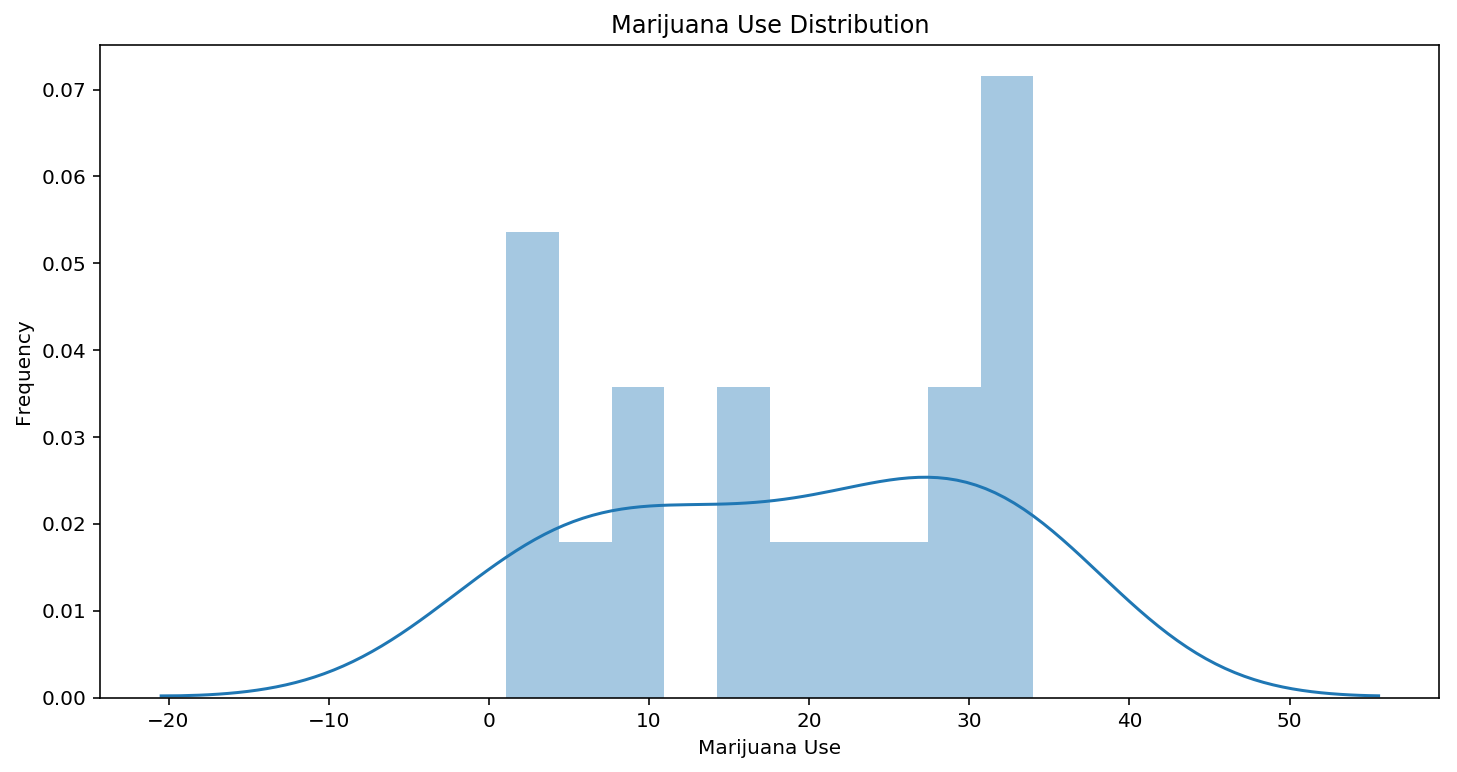

In [178]:
plt.figure(figsize=(12,6))
sns.distplot(df_drugs_marijuana['marijuana-use'], bins=10).set(title='Marijuana Use Distribution', xlabel='Marijuana Use', ylabel='Frequency')

In [179]:
marijuana_percentile = [stats.percentileofscore(df_drugs_marijuana['marijuana-use'], num) for num in df_drugs_marijuana['marijuana-use']]

[Text(0,0.5,u'Frequency'),
 Text(0.5,0,u'Marijuana Use'),
 Text(0.5,1,u'Marijuana Percentile Distribution')]

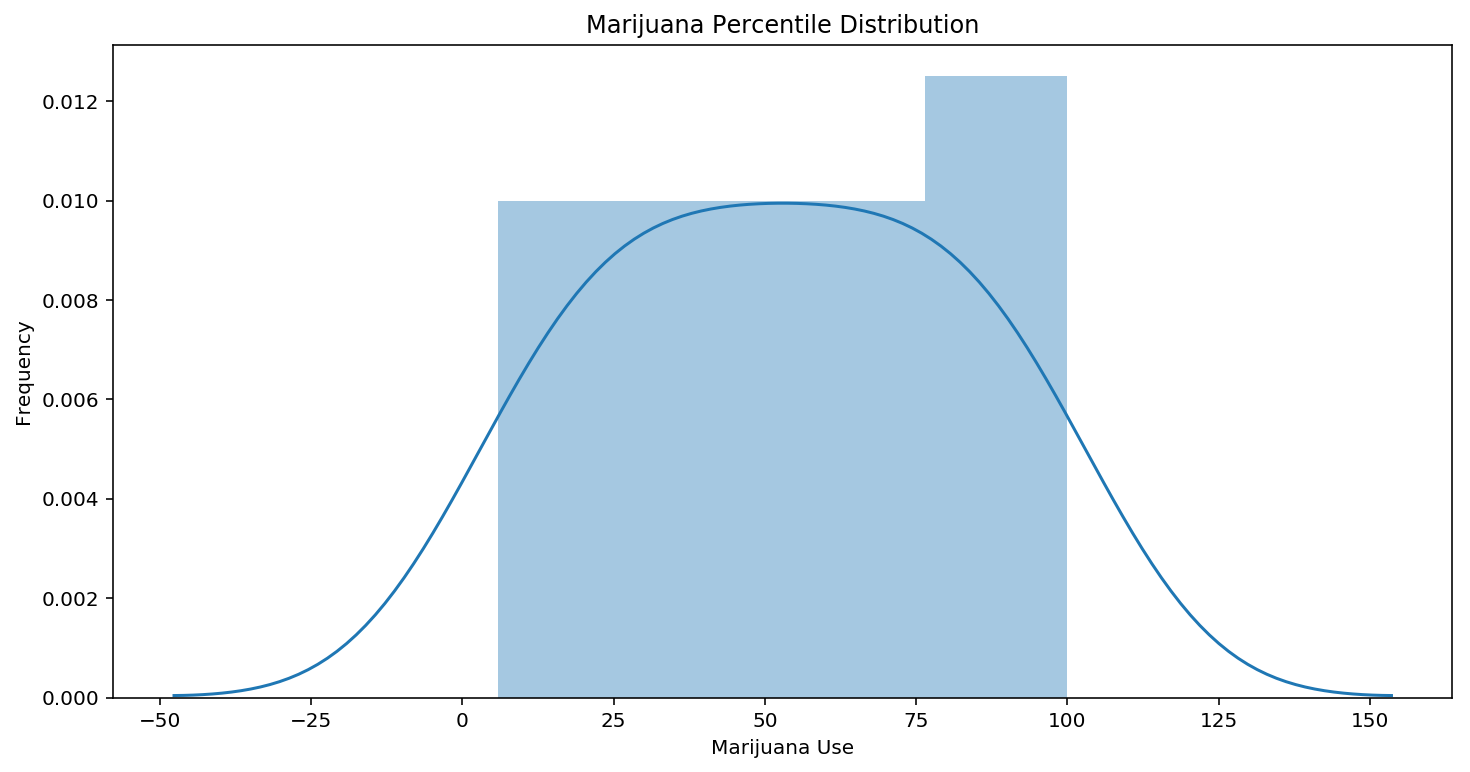

In [180]:
plt.figure(figsize=(12,6))
sns.distplot(marijuana_percentile, bins=4).set(title='Marijuana Percentile Distribution', xlabel='Marijuana Use', ylabel='Frequency')

Plotting with percentile distribution has changed the shape of the distribution to a normal distribution.

In [181]:
marijuana_percentile.sort()

In [182]:
marijuana_percentile

[5.88235294117647,
 11.76470588235294,
 17.647058823529413,
 23.52941176470588,
 29.411764705882355,
 35.294117647058826,
 41.17647058823529,
 47.05882352941176,
 52.94117647058824,
 58.82352941176471,
 64.70588235294117,
 70.58823529411765,
 76.47058823529412,
 82.35294117647058,
 88.23529411764706,
 94.11764705882352,
 100.0]